In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

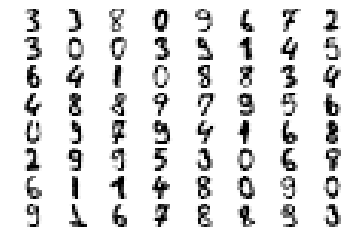

In [2]:
from random import randint

for i in range(64):
    ax = plt.subplot(8, 8, i+1)
    ax.axis('off')
    plt.imshow(digits.images[randint(0, digits.images.shape[0])], cmap='Greys')
plt.show()

In [3]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [4]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [5]:
def get_winner(class1):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 1617
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, 6)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [6]:
import numpy as np
number_codes = []
for i in range(2**(10-1), 2**10-1):
    for j in bin(i).split('b')[1]:
        number_codes.append(int(j))
number_codes = np.array(number_codes).reshape(2**9 - 1,10).T.tolist() 

In [7]:
classes = []
for i in range(2**(10-1) - 1):
    code_list = np.array(number_codes).T[i]
    classes.append(np.where(code_list==1)[0].tolist())

In [8]:
winner_list = []

for i,class1 in enumerate(classes):
    print("running:{}/511".format(i))
    winner = get_winner(class1)
    winner_list.append(winner)

running:0/511
number of class1:162
number of class2:1455

 ****** Running generation 0 ****** 

Population's average fitness: 0.55428 stdev: 0.29698
Best fitness: 0.95733 - size: (2, 13) - species 1 - id 93
Average adjusted fitness: 0.482
Mean genetic distance 2.891, standard deviation 0.474
Population of 198 members in 21 species
Total extinctions: 0
Generation time: 17.086 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.75754 stdev: 0.22390
Best fitness: 0.95733 - size: (2, 13) - species 9 - id 93
Average adjusted fitness: 0.631
Mean genetic distance 3.019, standard deviation 0.476
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 18.041 sec (17.563 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.77388 stdev: 0.21149
Best fitness: 0.95733 - size: (2, 13) - species 3 - id 93
Average adjusted fitness: 0.628
Mean genetic distance 3.033, standard deviation 0.476
Population of 201 members in 28 species


Mean genetic distance 3.051, standard deviation 0.506
Population of 205 members in 31 species
Total extinctions: 0
Generation time: 17.449 sec (15.857 average)
running:4/511
number of class1:322
number of class2:1295

 ****** Running generation 0 ****** 

Population's average fitness: 0.52796 stdev: 0.21824
Best fitness: 0.82808 - size: (2, 13) - species 4 - id 100
Average adjusted fitness: 0.368
Mean genetic distance 2.915, standard deviation 0.480
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 14.115 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.67310 stdev: 0.17503
Best fitness: 0.85096 - size: (3, 15) - species 7 - id 357
Average adjusted fitness: 0.514
Mean genetic distance 2.948, standard deviation 0.461
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 15.258 sec (14.687 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.71239 stdev: 0.16521
Best fitness: 0.86827 

Population's average fitness: 0.59855 stdev: 0.09653
Best fitness: 0.77922 - size: (3, 15) - species 8 - id 803
Average adjusted fitness: 0.269
Mean genetic distance 3.093, standard deviation 0.469
Population of 205 members in 32 species
Total extinctions: 0
Generation time: 18.573 sec (16.632 average)
running:8/511
number of class1:325
number of class2:1292

 ****** Running generation 0 ****** 

Population's average fitness: 0.55891 stdev: 0.21655
Best fitness: 0.84601 - size: (2, 13) - species 1 - id 106
Average adjusted fitness: 0.436
Mean genetic distance 2.907, standard deviation 0.493
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 13.854 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.64370 stdev: 0.19497
Best fitness: 0.89301 - size: (3, 13) - species 5 - id 325
Average adjusted fitness: 0.448
Mean genetic distance 3.061, standard deviation 0.470
Population of 199 members in 31 species
Total extinctions: 0
Generation time

Mean genetic distance 3.105, standard deviation 0.481
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 17.254 sec (15.230 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.61697 stdev: 0.08529
Best fitness: 0.78046 - size: (4, 15) - species 22 - id 547
Average adjusted fitness: 0.209
Mean genetic distance 3.158, standard deviation 0.476
Population of 209 members in 42 species
Total extinctions: 0
Generation time: 17.250 sec (15.567 average)
running:12/511
number of class1:485
number of class2:1132

 ****** Running generation 0 ****** 

Population's average fitness: 0.53056 stdev: 0.14866
Best fitness: 0.79963 - size: (2, 13) - species 6 - id 63
Average adjusted fitness: 0.275
Mean genetic distance 3.012, standard deviation 0.488
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 13.745 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.62577 stdev: 0.13402
Best fitness: 0.80272

Population's average fitness: 0.56415 stdev: 0.07258
Best fitness: 0.72233 - size: (3, 15) - species 29 - id 360
Average adjusted fitness: 0.208
Mean genetic distance 3.105, standard deviation 0.497
Population of 196 members in 32 species
Total extinctions: 0
Generation time: 15.829 sec (14.981 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.57297 stdev: 0.07346
Best fitness: 0.74830 - size: (3, 16) - species 29 - id 971
Average adjusted fitness: 0.149
Mean genetic distance 3.156, standard deviation 0.497
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 16.111 sec (15.170 average)
running:16/511
number of class1:326
number of class2:1291

 ****** Running generation 0 ****** 

Population's average fitness: 0.59684 stdev: 0.19677
Best fitness: 0.84416 - size: (2, 13) - species 2 - id 17
Average adjusted fitness: 0.408
Mean genetic distance 2.794, standard deviation 0.462
Population of 199 members in 15 species
Total extinctions

Mean genetic distance 3.134, standard deviation 0.507
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 15.457 sec (14.582 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.60700 stdev: 0.09758
Best fitness: 0.78726 - size: (3, 16) - species 32 - id 734
Average adjusted fitness: 0.288
Mean genetic distance 3.100, standard deviation 0.496
Population of 205 members in 33 species
Total extinctions: 0
Generation time: 15.478 sec (14.761 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.61301 stdev: 0.09405
Best fitness: 0.78726 - size: (3, 16) - species 32 - id 734
Average adjusted fitness: 0.289
Mean genetic distance 3.159, standard deviation 0.489
Population of 204 members in 39 species
Total extinctions: 0
Generation time: 16.309 sec (15.019 average)
running:20/511
number of class1:486
number of class2:1131

 ****** Running generation 0 ****** 

Population's average fitness: 0.53781 stdev: 0.14430
Be

Population's average fitness: 0.57965 stdev: 0.07965
Best fitness: 0.77056 - size: (3, 15) - species 29 - id 548
Average adjusted fitness: 0.227
Mean genetic distance 3.093, standard deviation 0.482
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 15.874 sec (14.952 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.58200 stdev: 0.08089
Best fitness: 0.77056 - size: (3, 15) - species 29 - id 548
Average adjusted fitness: 0.237
Mean genetic distance 3.106, standard deviation 0.486
Population of 195 members in 36 species
Total extinctions: 0
Generation time: 16.341 sec (15.230 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58360 stdev: 0.07862
Best fitness: 0.77056 - size: (3, 15) - species 29 - id 548
Average adjusted fitness: 0.292
Mean genetic distance 3.095, standard deviation 0.489
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 16.284 sec (15.405 average)
running

Mean genetic distance 2.988, standard deviation 0.461
Population of 204 members in 32 species
Total extinctions: 0
Generation time: 15.417 sec (14.454 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.56868 stdev: 0.08441
Best fitness: 0.73284 - size: (3, 14) - species 27 - id 659
Average adjusted fitness: 0.244
Mean genetic distance 3.027, standard deviation 0.471
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 15.615 sec (14.744 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.57657 stdev: 0.08319
Best fitness: 0.77675 - size: (4, 16) - species 33 - id 828
Average adjusted fitness: 0.248
Mean genetic distance 3.047, standard deviation 0.472
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 16.027 sec (15.001 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59179 stdev: 0.08199
Best fitness: 0.77675 - size: (4, 16) - species 33 - id 828


Population's average fitness: 0.54839 stdev: 0.09242
Best fitness: 0.74212 - size: (4, 17) - species 4 - id 412
Average adjusted fitness: 0.219
Mean genetic distance 3.014, standard deviation 0.453
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 15.961 sec (15.197 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.57415 stdev: 0.08754
Best fitness: 0.74212 - size: (4, 17) - species 4 - id 412
Average adjusted fitness: 0.314
Mean genetic distance 3.074, standard deviation 0.443
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 16.530 sec (15.530 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.58168 stdev: 0.08814
Best fitness: 0.74212 - size: (4, 17) - species 4 - id 412
Average adjusted fitness: 0.330
Mean genetic distance 3.086, standard deviation 0.463
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 17.186 sec (15.861 average)

 ****** R

Mean genetic distance 2.969, standard deviation 0.474
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 15.826 sec (15.112 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57304 stdev: 0.08546
Best fitness: 0.74088 - size: (3, 15) - species 7 - id 219
Average adjusted fitness: 0.291
Mean genetic distance 3.032, standard deviation 0.496
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 16.792 sec (15.672 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.59692 stdev: 0.08332
Best fitness: 0.74088 - size: (3, 15) - species 7 - id 219
Average adjusted fitness: 0.265
Mean genetic distance 3.071, standard deviation 0.496
Population of 206 members in 29 species
Total extinctions: 0
Generation time: 18.182 sec (16.299 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.60844 stdev: 0.08081
Best fitness: 0.76871 - size: (4, 17) - species 4 - id 797
Ave

Population's average fitness: 0.52242 stdev: 0.06631
Best fitness: 0.69821 - size: (3, 15) - species 6 - id 372
Average adjusted fitness: 0.208
Mean genetic distance 3.033, standard deviation 0.511
Population of 198 members in 26 species
Total extinctions: 0
Generation time: 16.921 sec (16.291 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55124 stdev: 0.07218
Best fitness: 0.76871 - size: (4, 16) - species 26 - id 549
Average adjusted fitness: 0.226
Mean genetic distance 3.073, standard deviation 0.514
Population of 197 members in 28 species
Total extinctions: 0
Generation time: 16.103 sec (16.229 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.57407 stdev: 0.08154
Best fitness: 0.76871 - size: (4, 16) - species 26 - id 549
Average adjusted fitness: 0.243
Mean genetic distance 3.093, standard deviation 0.511
Population of 205 members in 30 species
Total extinctions: 0
Generation time: 16.569 sec (16.314 average)

 ******

Mean genetic distance 2.860, standard deviation 0.486
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 16.808 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54235 stdev: 0.07964
Best fitness: 0.76438 - size: (2, 13) - species 5 - id 361
Average adjusted fitness: 0.206
Mean genetic distance 3.022, standard deviation 0.506
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 16.031 sec (16.420 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54874 stdev: 0.08037
Best fitness: 0.76438 - size: (2, 13) - species 21 - id 361
Average adjusted fitness: 0.248
Mean genetic distance 3.091, standard deviation 0.522
Population of 202 members in 27 species
Total extinctions: 0
Generation time: 19.430 sec (17.423 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.56668 stdev: 0.08551
Best fitness: 0.76438 - size: (2, 13) - species 21 - id 361
Average adjusted f


 ****** Running generation 0 ****** 

Population's average fitness: 0.48146 stdev: 0.09745
Best fitness: 0.77304 - size: (2, 13) - species 5 - id 36
Average adjusted fitness: 0.200
Mean genetic distance 2.946, standard deviation 0.547
Population of 201 members in 20 species
Total extinctions: 0
Generation time: 18.547 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52746 stdev: 0.10057
Best fitness: 0.77304 - size: (2, 13) - species 1 - id 36
Average adjusted fitness: 0.264
Mean genetic distance 3.048, standard deviation 0.519
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 18.462 sec (18.504 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55198 stdev: 0.10711
Best fitness: 0.77304 - size: (2, 13) - species 1 - id 36
Average adjusted fitness: 0.285
Mean genetic distance 3.104, standard deviation 0.492
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 18.433 sec (18.481 


 ****** Running generation 0 ****** 

Population's average fitness: 0.49741 stdev: 0.06378
Best fitness: 0.72418 - size: (2, 13) - species 1 - id 15
Average adjusted fitness: 0.185
Mean genetic distance 2.949, standard deviation 0.514
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 15.501 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53530 stdev: 0.06677
Best fitness: 0.72418 - size: (2, 13) - species 4 - id 15
Average adjusted fitness: 0.239
Mean genetic distance 3.065, standard deviation 0.500
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 16.262 sec (15.881 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54718 stdev: 0.07430
Best fitness: 0.73593 - size: (4, 17) - species 11 - id 478
Average adjusted fitness: 0.223
Mean genetic distance 3.079, standard deviation 0.509
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 17.327 sec (16.36


 ****** Running generation 0 ****** 

Population's average fitness: 0.48116 stdev: 0.08875
Best fitness: 0.72975 - size: (2, 13) - species 3 - id 26
Average adjusted fitness: 0.222
Mean genetic distance 2.818, standard deviation 0.436
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 14.658 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55205 stdev: 0.09079
Best fitness: 0.73098 - size: (2, 12) - species 2 - id 318
Average adjusted fitness: 0.241
Mean genetic distance 2.904, standard deviation 0.498
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 16.327 sec (15.492 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56547 stdev: 0.08878
Best fitness: 0.73346 - size: (3, 14) - species 5 - id 461
Average adjusted fitness: 0.248
Mean genetic distance 2.952, standard deviation 0.527
Population of 202 members in 27 species
Total extinctions: 0
Generation time: 17.543 sec (16.17


 ****** Running generation 0 ****** 

Population's average fitness: 0.46950 stdev: 0.10387
Best fitness: 0.75201 - size: (2, 13) - species 4 - id 77
Average adjusted fitness: 0.255
Mean genetic distance 2.858, standard deviation 0.460
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 18.279 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53229 stdev: 0.11400
Best fitness: 0.76500 - size: (3, 15) - species 16 - id 334
Average adjusted fitness: 0.356
Mean genetic distance 3.012, standard deviation 0.509
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 19.456 sec (18.867 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57183 stdev: 0.10706
Best fitness: 0.77180 - size: (4, 16) - species 6 - id 487
Average adjusted fitness: 0.301
Mean genetic distance 3.114, standard deviation 0.512
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 18.234 sec (18.6


 ****** Running generation 0 ****** 

Population's average fitness: 0.46516 stdev: 0.15381
Best fitness: 0.78479 - size: (2, 13) - species 12 - id 163
Average adjusted fitness: 0.268
Mean genetic distance 2.883, standard deviation 0.495
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 15.346 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55210 stdev: 0.16008
Best fitness: 0.78479 - size: (2, 13) - species 12 - id 163
Average adjusted fitness: 0.294
Mean genetic distance 2.939, standard deviation 0.505
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 15.799 sec (15.573 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58892 stdev: 0.15283
Best fitness: 0.81694 - size: (2, 14) - species 3 - id 439
Average adjusted fitness: 0.337
Mean genetic distance 2.950, standard deviation 0.499
Population of 203 members in 26 species
Total extinctions: 0
Generation time: 16.033 sec (15


Population's average fitness: 0.51958 stdev: 0.09704
Best fitness: 0.71800 - size: (2, 13) - species 6 - id 166
Average adjusted fitness: 0.238
Mean genetic distance 2.968, standard deviation 0.497
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 14.636 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56465 stdev: 0.09548
Best fitness: 0.74892 - size: (3, 14) - species 14 - id 271
Average adjusted fitness: 0.210
Mean genetic distance 3.084, standard deviation 0.509
Population of 198 members in 27 species
Total extinctions: 0
Generation time: 15.388 sec (15.012 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58523 stdev: 0.09605
Best fitness: 0.76190 - size: (3, 16) - species 15 - id 494
Average adjusted fitness: 0.304
Mean genetic distance 3.108, standard deviation 0.499
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 15.961 sec (15.329 average)

 ****** Running generat


 ****** Running generation 0 ****** 

Population's average fitness: 0.50430 stdev: 0.07444
Best fitness: 0.72727 - size: (2, 13) - species 6 - id 173
Average adjusted fitness: 0.270
Mean genetic distance 2.859, standard deviation 0.462
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 17.367 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52739 stdev: 0.08149
Best fitness: 0.76438 - size: (3, 15) - species 6 - id 371
Average adjusted fitness: 0.292
Mean genetic distance 2.991, standard deviation 0.482
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 18.211 sec (17.789 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54519 stdev: 0.07324
Best fitness: 0.77180 - size: (3, 16) - species 6 - id 547
Average adjusted fitness: 0.225
Mean genetic distance 3.040, standard deviation 0.506
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 19.128 sec (18.2


 ****** Running generation 0 ****** 

Population's average fitness: 0.49782 stdev: 0.07185
Best fitness: 0.72109 - size: (2, 13) - species 1 - id 6
Average adjusted fitness: 0.198
Mean genetic distance 2.816, standard deviation 0.432
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 21.145 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53157 stdev: 0.07714
Best fitness: 0.78108 - size: (3, 15) - species 15 - id 367
Average adjusted fitness: 0.204
Mean genetic distance 2.911, standard deviation 0.465
Population of 202 members in 23 species
Total extinctions: 0
Generation time: 23.381 sec (22.263 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55097 stdev: 0.08472
Best fitness: 0.78108 - size: (3, 15) - species 4 - id 367
Average adjusted fitness: 0.194
Mean genetic distance 2.947, standard deviation 0.473
Population of 203 members in 28 species
Total extinctions: 0
Generation time: 24.778 sec (23.10


 ****** Running generation 0 ****** 

Population's average fitness: 0.48053 stdev: 0.09775
Best fitness: 0.67904 - size: (2, 13) - species 4 - id 11
Average adjusted fitness: 0.169
Mean genetic distance 2.936, standard deviation 0.481
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 19.802 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52234 stdev: 0.10232
Best fitness: 0.70748 - size: (3, 15) - species 1 - id 319
Average adjusted fitness: 0.213
Mean genetic distance 3.050, standard deviation 0.490
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 23.464 sec (21.633 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56179 stdev: 0.09479
Best fitness: 0.70748 - size: (3, 15) - species 1 - id 319
Average adjusted fitness: 0.211
Mean genetic distance 3.102, standard deviation 0.502
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 25.273 sec (22.84


 ****** Running generation 0 ****** 

Population's average fitness: 0.51471 stdev: 0.07760
Best fitness: 0.77798 - size: (2, 13) - species 2 - id 55
Average adjusted fitness: 0.248
Mean genetic distance 2.850, standard deviation 0.452
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 19.029 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53790 stdev: 0.08260
Best fitness: 0.77860 - size: (3, 14) - species 15 - id 304
Average adjusted fitness: 0.210
Mean genetic distance 2.921, standard deviation 0.475
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 20.457 sec (19.743 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55161 stdev: 0.08778
Best fitness: 0.80272 - size: (3, 15) - species 1 - id 519
Average adjusted fitness: 0.215
Mean genetic distance 2.998, standard deviation 0.475
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 20.616 sec (20.0


 ****** Running generation 0 ****** 

Population's average fitness: 0.48911 stdev: 0.10655
Best fitness: 0.73902 - size: (2, 13) - species 6 - id 182
Average adjusted fitness: 0.308
Mean genetic distance 2.908, standard deviation 0.486
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 21.411 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54976 stdev: 0.11354
Best fitness: 0.77242 - size: (3, 14) - species 12 - id 264
Average adjusted fitness: 0.260
Mean genetic distance 2.953, standard deviation 0.482
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 20.619 sec (21.015 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56933 stdev: 0.11595
Best fitness: 0.77242 - size: (3, 14) - species 12 - id 264
Average adjusted fitness: 0.272
Mean genetic distance 3.031, standard deviation 0.491
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 24.955 sec (22


 ****** Running generation 0 ****** 

Population's average fitness: 0.47241 stdev: 0.09806
Best fitness: 0.71490 - size: (2, 13) - species 2 - id 94
Average adjusted fitness: 0.212
Mean genetic distance 2.884, standard deviation 0.458
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 18.126 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52472 stdev: 0.10555
Best fitness: 0.74583 - size: (3, 15) - species 7 - id 288
Average adjusted fitness: 0.273
Mean genetic distance 2.997, standard deviation 0.496
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 19.564 sec (18.845 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55238 stdev: 0.10400
Best fitness: 0.74583 - size: (3, 15) - species 7 - id 288
Average adjusted fitness: 0.279
Mean genetic distance 3.024, standard deviation 0.497
Population of 197 members in 26 species
Total extinctions: 0
Generation time: 20.677 sec (19.45


 ****** Running generation 0 ****** 

Population's average fitness: 0.44877 stdev: 0.15263
Best fitness: 0.78479 - size: (2, 13) - species 2 - id 51
Average adjusted fitness: 0.263
Mean genetic distance 2.935, standard deviation 0.484
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 18.516 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57267 stdev: 0.15062
Best fitness: 0.78479 - size: (2, 13) - species 7 - id 51
Average adjusted fitness: 0.299
Mean genetic distance 3.020, standard deviation 0.458
Population of 203 members in 31 species
Total extinctions: 0
Generation time: 24.376 sec (21.446 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60583 stdev: 0.14344
Best fitness: 0.79468 - size: (4, 17) - species 29 - id 448
Average adjusted fitness: 0.358
Mean genetic distance 3.009, standard deviation 0.468
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 27.328 sec (23.40


 ****** Running generation 0 ****** 

Population's average fitness: 0.49714 stdev: 0.06376
Best fitness: 0.72913 - size: (2, 13) - species 7 - id 175
Average adjusted fitness: 0.180
Mean genetic distance 2.864, standard deviation 0.472
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 19.653 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53424 stdev: 0.06218
Best fitness: 0.72913 - size: (2, 13) - species 7 - id 175
Average adjusted fitness: 0.157
Mean genetic distance 2.911, standard deviation 0.474
Population of 202 members in 21 species
Total extinctions: 0
Generation time: 21.486 sec (20.570 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54515 stdev: 0.06959
Best fitness: 0.72913 - size: (2, 13) - species 6 - id 175
Average adjusted fitness: 0.224
Mean genetic distance 2.986, standard deviation 0.512
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 21.448 sec (20.8


 ****** Running generation 0 ****** 

Population's average fitness: 0.47074 stdev: 0.09156
Best fitness: 0.69450 - size: (2, 13) - species 5 - id 160
Average adjusted fitness: 0.221
Mean genetic distance 2.961, standard deviation 0.492
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 18.588 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53617 stdev: 0.09791
Best fitness: 0.73346 - size: (2, 14) - species 2 - id 245
Average adjusted fitness: 0.232
Mean genetic distance 3.025, standard deviation 0.497
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 19.793 sec (19.190 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56821 stdev: 0.09083
Best fitness: 0.73717 - size: (3, 14) - species 22 - id 477
Average adjusted fitness: 0.309
Mean genetic distance 3.053, standard deviation 0.483
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 20.498 sec (19.


 ****** Running generation 0 ****** 

Population's average fitness: 0.48110 stdev: 0.10204
Best fitness: 0.76067 - size: (2, 13) - species 2 - id 78
Average adjusted fitness: 0.215
Mean genetic distance 2.915, standard deviation 0.469
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 18.760 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54794 stdev: 0.09098
Best fitness: 0.76067 - size: (2, 13) - species 4 - id 78
Average adjusted fitness: 0.226
Mean genetic distance 3.002, standard deviation 0.492
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 20.292 sec (19.526 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56719 stdev: 0.09741
Best fitness: 0.76067 - size: (2, 13) - species 4 - id 78
Average adjusted fitness: 0.313
Mean genetic distance 3.088, standard deviation 0.500
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 21.528 sec (20.193 


 ****** Running generation 0 ****** 

Population's average fitness: 0.44614 stdev: 0.14096
Best fitness: 0.71800 - size: (2, 13) - species 1 - id 120
Average adjusted fitness: 0.212
Mean genetic distance 2.833, standard deviation 0.465
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 18.925 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55419 stdev: 0.13952
Best fitness: 0.75201 - size: (2, 14) - species 12 - id 277
Average adjusted fitness: 0.297
Mean genetic distance 2.954, standard deviation 0.481
Population of 198 members in 28 species
Total extinctions: 0
Generation time: 20.329 sec (19.627 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60725 stdev: 0.13356
Best fitness: 0.77056 - size: (3, 15) - species 25 - id 495
Average adjusted fitness: 0.329
Mean genetic distance 3.043, standard deviation 0.490
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 20.975 sec (20


 ****** Running generation 0 ****** 

Population's average fitness: 0.49055 stdev: 0.09775
Best fitness: 0.68646 - size: (2, 13) - species 6 - id 62
Average adjusted fitness: 0.175
Mean genetic distance 2.888, standard deviation 0.487
Population of 198 members in 20 species
Total extinctions: 0
Generation time: 27.656 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52636 stdev: 0.10065
Best fitness: 0.76314 - size: (3, 15) - species 18 - id 350
Average adjusted fitness: 0.217
Mean genetic distance 2.923, standard deviation 0.513
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 28.959 sec (28.308 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56560 stdev: 0.09978
Best fitness: 0.76314 - size: (3, 15) - species 18 - id 350
Average adjusted fitness: 0.262
Mean genetic distance 2.956, standard deviation 0.507
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 25.941 sec (27.


 ****** Running generation 0 ****** 

Population's average fitness: 0.46463 stdev: 0.14365
Best fitness: 0.72727 - size: (2, 13) - species 5 - id 169
Average adjusted fitness: 0.234
Mean genetic distance 2.862, standard deviation 0.439
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 25.719 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55746 stdev: 0.15375
Best fitness: 0.81447 - size: (2, 14) - species 8 - id 245
Average adjusted fitness: 0.291
Mean genetic distance 3.021, standard deviation 0.478
Population of 203 members in 30 species
Total extinctions: 0
Generation time: 26.076 sec (25.898 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60949 stdev: 0.13208
Best fitness: 0.81447 - size: (2, 14) - species 8 - id 245
Average adjusted fitness: 0.337
Mean genetic distance 3.026, standard deviation 0.471
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 24.918 sec (25.5


 ****** Running generation 0 ****** 

Population's average fitness: 0.46612 stdev: 0.15817
Best fitness: 0.82560 - size: (2, 13) - species 5 - id 45
Average adjusted fitness: 0.231
Mean genetic distance 2.800, standard deviation 0.480
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 22.115 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56280 stdev: 0.16822
Best fitness: 0.82560 - size: (2, 13) - species 5 - id 45
Average adjusted fitness: 0.329
Mean genetic distance 2.986, standard deviation 0.489
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 26.359 sec (24.237 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60349 stdev: 0.15623
Best fitness: 0.82560 - size: (2, 13) - species 17 - id 45
Average adjusted fitness: 0.346
Mean genetic distance 3.034, standard deviation 0.475
Population of 196 members in 33 species
Total extinctions: 0
Generation time: 26.009 sec (24.828


 ****** Running generation 0 ****** 

Population's average fitness: 0.46879 stdev: 0.22248
Best fitness: 0.83426 - size: (2, 13) - species 1 - id 97
Average adjusted fitness: 0.277
Mean genetic distance 2.881, standard deviation 0.475
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 22.885 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.60822 stdev: 0.20781
Best fitness: 0.83426 - size: (2, 13) - species 1 - id 97
Average adjusted fitness: 0.464
Mean genetic distance 2.999, standard deviation 0.489
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 25.043 sec (23.964 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.67870 stdev: 0.18354
Best fitness: 0.84725 - size: (3, 14) - species 1 - id 530
Average adjusted fitness: 0.513
Mean genetic distance 3.011, standard deviation 0.498
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 26.128 sec (24.685


 ****** Running generation 0 ****** 

Population's average fitness: 0.51782 stdev: 0.09031
Best fitness: 0.72109 - size: (2, 13) - species 6 - id 141
Average adjusted fitness: 0.204
Mean genetic distance 2.898, standard deviation 0.475
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 25.372 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55248 stdev: 0.08486
Best fitness: 0.72789 - size: (3, 16) - species 21 - id 331
Average adjusted fitness: 0.209
Mean genetic distance 2.945, standard deviation 0.494
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 26.696 sec (26.034 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57072 stdev: 0.08619
Best fitness: 0.75263 - size: (4, 17) - species 21 - id 531
Average adjusted fitness: 0.268
Mean genetic distance 2.981, standard deviation 0.508
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 26.516 sec (26


 ****** Running generation 0 ****** 

Population's average fitness: 0.50731 stdev: 0.05517
Best fitness: 0.66790 - size: (2, 13) - species 2 - id 91
Average adjusted fitness: 0.169
Mean genetic distance 2.851, standard deviation 0.452
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 21.132 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53775 stdev: 0.05869
Best fitness: 0.71738 - size: (2, 14) - species 2 - id 215
Average adjusted fitness: 0.123
Mean genetic distance 2.978, standard deviation 0.468
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 22.934 sec (22.033 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54623 stdev: 0.06541
Best fitness: 0.73284 - size: (3, 16) - species 2 - id 548
Average adjusted fitness: 0.144
Mean genetic distance 2.988, standard deviation 0.479
Population of 203 members in 31 species
Total extinctions: 0
Generation time: 22.514 sec (22.19


 ****** Running generation 0 ****** 

Population's average fitness: 0.49842 stdev: 0.06204
Best fitness: 0.71738 - size: (2, 13) - species 1 - id 3
Average adjusted fitness: 0.226
Mean genetic distance 2.801, standard deviation 0.477
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 23.613 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54221 stdev: 0.07074
Best fitness: 0.71738 - size: (2, 13) - species 1 - id 3
Average adjusted fitness: 0.192
Mean genetic distance 2.934, standard deviation 0.508
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 21.682 sec (22.648 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56776 stdev: 0.08142
Best fitness: 0.74026 - size: (3, 15) - species 6 - id 539
Average adjusted fitness: 0.302
Mean genetic distance 2.935, standard deviation 0.493
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 22.148 sec (22.481 a


 ****** Running generation 0 ****** 

Population's average fitness: 0.48893 stdev: 0.08634
Best fitness: 0.71119 - size: (2, 13) - species 4 - id 96
Average adjusted fitness: 0.174
Mean genetic distance 2.871, standard deviation 0.416
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 20.353 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53795 stdev: 0.08589
Best fitness: 0.71119 - size: (2, 13) - species 4 - id 96
Average adjusted fitness: 0.190
Mean genetic distance 2.917, standard deviation 0.446
Population of 198 members in 29 species
Total extinctions: 0
Generation time: 22.988 sec (21.670 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56050 stdev: 0.08298
Best fitness: 0.71119 - size: (2, 13) - species 4 - id 96
Average adjusted fitness: 0.249
Mean genetic distance 2.925, standard deviation 0.452
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 22.737 sec (22.026 


 ****** Running generation 0 ****** 

Population's average fitness: 0.50767 stdev: 0.06455
Best fitness: 0.70130 - size: (2, 13) - species 2 - id 30
Average adjusted fitness: 0.259
Mean genetic distance 2.978, standard deviation 0.502
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 21.141 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53529 stdev: 0.06735
Best fitness: 0.73222 - size: (3, 15) - species 8 - id 370
Average adjusted fitness: 0.200
Mean genetic distance 3.054, standard deviation 0.499
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 22.880 sec (22.010 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55405 stdev: 0.07411
Best fitness: 0.73222 - size: (3, 15) - species 26 - id 370
Average adjusted fitness: 0.240
Mean genetic distance 3.032, standard deviation 0.480
Population of 206 members in 34 species
Total extinctions: 0
Generation time: 25.133 sec (23.0

Mean genetic distance 3.131, standard deviation 0.509
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 30.552 sec (26.271 average)
running:151/511
number of class1:965
number of class2:652

 ****** Running generation 0 ****** 

Population's average fitness: 0.48408 stdev: 0.09571
Best fitness: 0.74892 - size: (2, 13) - species 2 - id 198
Average adjusted fitness: 0.201
Mean genetic distance 2.893, standard deviation 0.443
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 22.908 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53570 stdev: 0.09434
Best fitness: 0.74892 - size: (2, 13) - species 3 - id 198
Average adjusted fitness: 0.233
Mean genetic distance 2.981, standard deviation 0.462
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 25.215 sec (24.062 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55357 stdev: 0.09907
Best fitness: 0.74892

Population's average fitness: 0.58451 stdev: 0.07932
Best fitness: 0.77118 - size: (5, 17) - species 29 - id 957
Average adjusted fitness: 0.198
Mean genetic distance 3.168, standard deviation 0.505
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 31.125 sec (27.350 average)
running:155/511
number of class1:968
number of class2:649

 ****** Running generation 0 ****** 

Population's average fitness: 0.48790 stdev: 0.09409
Best fitness: 0.72665 - size: (2, 13) - species 7 - id 134
Average adjusted fitness: 0.194
Mean genetic distance 2.941, standard deviation 0.480
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 29.717 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54080 stdev: 0.09552
Best fitness: 0.72727 - size: (3, 15) - species 12 - id 273
Average adjusted fitness: 0.234
Mean genetic distance 3.015, standard deviation 0.490
Population of 198 members in 26 species
Total extinctions: 0
Generation t

Mean genetic distance 3.050, standard deviation 0.505
Population of 203 members in 30 species
Total extinctions: 0
Generation time: 33.448 sec (32.701 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58655 stdev: 0.08833
Best fitness: 0.73964 - size: (3, 15) - species 13 - id 687
Average adjusted fitness: 0.259
Mean genetic distance 3.096, standard deviation 0.503
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 34.537 sec (33.007 average)
running:159/511
number of class1:1128
number of class2:489

 ****** Running generation 0 ****** 

Population's average fitness: 0.46021 stdev: 0.14231
Best fitness: 0.75015 - size: (2, 13) - species 4 - id 151
Average adjusted fitness: 0.211
Mean genetic distance 2.960, standard deviation 0.487
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 30.157 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52868 stdev: 0.15139
Best fitness: 0.750

Population's average fitness: 0.58318 stdev: 0.08846
Best fitness: 0.72665 - size: (3, 15) - species 3 - id 655
Average adjusted fitness: 0.239
Mean genetic distance 3.036, standard deviation 0.498
Population of 209 members in 31 species
Total extinctions: 0
Generation time: 30.888 sec (25.657 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59314 stdev: 0.08471
Best fitness: 0.73655 - size: (5, 17) - species 13 - id 912
Average adjusted fitness: 0.212
Mean genetic distance 3.096, standard deviation 0.504
Population of 209 members in 34 species
Total extinctions: 0
Generation time: 32.831 sec (26.853 average)
running:163/511
number of class1:802
number of class2:815

 ****** Running generation 0 ****** 

Population's average fitness: 0.49947 stdev: 0.04858
Best fitness: 0.66357 - size: (2, 13) - species 2 - id 120
Average adjusted fitness: 0.123
Mean genetic distance 2.904, standard deviation 0.456
Population of 201 members in 27 species
Total extinctions

Mean genetic distance 3.050, standard deviation 0.497
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 36.740 sec (29.683 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.56114 stdev: 0.06735
Best fitness: 0.72913 - size: (3, 15) - species 2 - id 378
Average adjusted fitness: 0.161
Mean genetic distance 3.099, standard deviation 0.508
Population of 206 members in 34 species
Total extinctions: 0
Generation time: 30.367 sec (29.820 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.56796 stdev: 0.06274
Best fitness: 0.72913 - size: (3, 15) - species 2 - id 378
Average adjusted fitness: 0.207
Mean genetic distance 3.123, standard deviation 0.503
Population of 204 members in 34 species
Total extinctions: 0
Generation time: 26.615 sec (29.286 average)
running:167/511
number of class1:962
number of class2:655

 ****** Running generation 0 ****** 

Population's average fitness: 0.48603 stdev: 0.08789
Best

Population's average fitness: 0.56417 stdev: 0.08256
Best fitness: 0.76685 - size: (2, 14) - species 6 - id 671
Average adjusted fitness: 0.221
Mean genetic distance 3.095, standard deviation 0.460
Population of 197 members in 41 species
Total extinctions: 0
Generation time: 25.873 sec (24.738 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.57343 stdev: 0.08129
Best fitness: 0.76685 - size: (2, 14) - species 6 - id 671
Average adjusted fitness: 0.298
Mean genetic distance 3.104, standard deviation 0.462
Population of 202 members in 43 species
Total extinctions: 0
Generation time: 26.327 sec (25.056 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58429 stdev: 0.07785
Best fitness: 0.76685 - size: (2, 14) - species 6 - id 671
Average adjusted fitness: 0.136
Mean genetic distance 3.116, standard deviation 0.471
Population of 197 members in 44 species
Total extinctions: 0
Generation time: 25.992 sec (25.212 average)
running:17

Mean genetic distance 3.030, standard deviation 0.518
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 26.182 sec (25.565 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.56682 stdev: 0.09731
Best fitness: 0.81633 - size: (4, 17) - species 4 - id 685
Average adjusted fitness: 0.221
Mean genetic distance 3.138, standard deviation 0.524
Population of 198 members in 27 species
Total extinctions: 0
Generation time: 25.202 sec (25.474 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.58537 stdev: 0.10459
Best fitness: 0.81633 - size: (4, 17) - species 4 - id 685
Average adjusted fitness: 0.328
Mean genetic distance 3.178, standard deviation 0.520
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 27.214 sec (25.822 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.60823 stdev: 0.10015
Best fitness: 0.83488 - size: (4, 17) - species 2 - id 986
Ave

Population's average fitness: 0.52908 stdev: 0.05149
Best fitness: 0.68460 - size: (2, 13) - species 2 - id 69
Average adjusted fitness: 0.189
Mean genetic distance 3.016, standard deviation 0.481
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 26.046 sec (25.547 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.54733 stdev: 0.05441
Best fitness: 0.68460 - size: (2, 13) - species 2 - id 69
Average adjusted fitness: 0.193
Mean genetic distance 3.059, standard deviation 0.469
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 27.041 sec (25.920 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.55576 stdev: 0.05605
Best fitness: 0.68460 - size: (2, 13) - species 2 - id 69
Average adjusted fitness: 0.172
Mean genetic distance 3.104, standard deviation 0.492
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 27.722 sec (26.281 average)

 ****** Runn

Mean genetic distance 3.032, standard deviation 0.489
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 25.723 sec (25.290 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55768 stdev: 0.08654
Best fitness: 0.72913 - size: (3, 14) - species 7 - id 248
Average adjusted fitness: 0.254
Mean genetic distance 3.113, standard deviation 0.483
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 33.471 sec (28.017 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.57130 stdev: 0.08257
Best fitness: 0.73840 - size: (4, 15) - species 24 - id 614
Average adjusted fitness: 0.219
Mean genetic distance 3.118, standard deviation 0.473
Population of 209 members in 36 species
Total extinctions: 0
Generation time: 37.294 sec (30.336 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.57499 stdev: 0.08360
Best fitness: 0.73840 - size: (4, 15) - species 24 - id 614
A

Population's average fitness: 0.52763 stdev: 0.10042
Best fitness: 0.70006 - size: (3, 15) - species 6 - id 337
Average adjusted fitness: 0.222
Mean genetic distance 2.941, standard deviation 0.474
Population of 197 members in 23 species
Total extinctions: 0
Generation time: 21.779 sec (21.129 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55865 stdev: 0.09107
Best fitness: 0.71058 - size: (2, 13) - species 21 - id 488
Average adjusted fitness: 0.278
Mean genetic distance 2.978, standard deviation 0.500
Population of 196 members in 29 species
Total extinctions: 0
Generation time: 23.364 sec (21.874 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.57238 stdev: 0.09748
Best fitness: 0.73408 - size: (4, 17) - species 11 - id 582
Average adjusted fitness: 0.263
Mean genetic distance 3.043, standard deviation 0.489
Population of 198 members in 29 species
Total extinctions: 0
Generation time: 22.276 sec (21.975 average)

 ******

Mean genetic distance 2.898, standard deviation 0.462
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 25.383 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56804 stdev: 0.14672
Best fitness: 0.80087 - size: (2, 13) - species 4 - id 50
Average adjusted fitness: 0.307
Mean genetic distance 2.982, standard deviation 0.458
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 21.059 sec (23.221 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.62026 stdev: 0.12069
Best fitness: 0.80087 - size: (2, 13) - species 23 - id 50
Average adjusted fitness: 0.340
Mean genetic distance 3.016, standard deviation 0.472
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 23.033 sec (23.158 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.64516 stdev: 0.11474
Best fitness: 0.80829 - size: (3, 14) - species 30 - id 646
Average adjusted fit


 ****** Running generation 0 ****** 

Population's average fitness: 0.52078 stdev: 0.08447
Best fitness: 0.65925 - size: (2, 13) - species 3 - id 7
Average adjusted fitness: 0.236
Mean genetic distance 2.919, standard deviation 0.458
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 21.621 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56271 stdev: 0.08163
Best fitness: 0.71305 - size: (3, 15) - species 23 - id 347
Average adjusted fitness: 0.227
Mean genetic distance 2.994, standard deviation 0.478
Population of 203 members in 28 species
Total extinctions: 0
Generation time: 21.543 sec (21.582 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56911 stdev: 0.08144
Best fitness: 0.72294 - size: (3, 14) - species 18 - id 424
Average adjusted fitness: 0.274
Mean genetic distance 2.967, standard deviation 0.482
Population of 206 members in 30 species
Total extinctions: 0
Generation time: 30.002 sec (24.3

Mean genetic distance 3.134, standard deviation 0.460
Population of 197 members in 36 species
Total extinctions: 0
Generation time: 32.746 sec (27.059 average)
running:198/511
number of class1:804
number of class2:813

 ****** Running generation 0 ****** 

Population's average fitness: 0.50243 stdev: 0.05853
Best fitness: 0.67532 - size: (2, 13) - species 1 - id 78
Average adjusted fitness: 0.169
Mean genetic distance 2.858, standard deviation 0.501
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 22.937 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53323 stdev: 0.06353
Best fitness: 0.69635 - size: (2, 13) - species 6 - id 325
Average adjusted fitness: 0.160
Mean genetic distance 2.987, standard deviation 0.489
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 21.239 sec (22.088 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55010 stdev: 0.07174
Best fitness: 0.73779 

Population's average fitness: 0.60437 stdev: 0.09711
Best fitness: 0.77613 - size: (2, 14) - species 17 - id 995
Average adjusted fitness: 0.334
Mean genetic distance 3.057, standard deviation 0.523
Population of 195 members in 26 species
Total extinctions: 0
Generation time: 26.633 sec (23.356 average)
running:202/511
number of class1:807
number of class2:810

 ****** Running generation 0 ****** 

Population's average fitness: 0.50429 stdev: 0.06887
Best fitness: 0.69326 - size: (2, 13) - species 1 - id 16
Average adjusted fitness: 0.241
Mean genetic distance 2.917, standard deviation 0.504
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 18.906 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54067 stdev: 0.07095
Best fitness: 0.74521 - size: (3, 14) - species 1 - id 372
Average adjusted fitness: 0.235
Mean genetic distance 2.995, standard deviation 0.487
Population of 199 members in 31 species
Total extinctions: 0
Generation tim

Mean genetic distance 3.062, standard deviation 0.494
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 27.428 sec (25.812 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58752 stdev: 0.09251
Best fitness: 0.75510 - size: (6, 20) - species 20 - id 968
Average adjusted fitness: 0.207
Mean genetic distance 3.072, standard deviation 0.495
Population of 196 members in 30 species
Total extinctions: 0
Generation time: 28.376 sec (26.239 average)
running:206/511
number of class1:967
number of class2:650

 ****** Running generation 0 ****** 

Population's average fitness: 0.48388 stdev: 0.08720
Best fitness: 0.66976 - size: (2, 13) - species 2 - id 45
Average adjusted fitness: 0.193
Mean genetic distance 2.934, standard deviation 0.503
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 32.648 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53529 stdev: 0.08715
Best fitness: 0.74212

Population's average fitness: 0.60450 stdev: 0.10838
Best fitness: 0.80148 - size: (3, 15) - species 5 - id 532
Average adjusted fitness: 0.247
Mean genetic distance 3.151, standard deviation 0.487
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 29.156 sec (24.903 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.61594 stdev: 0.10278
Best fitness: 0.80148 - size: (3, 15) - species 5 - id 532
Average adjusted fitness: 0.240
Mean genetic distance 3.207, standard deviation 0.486
Population of 204 members in 37 species
Total extinctions: 0
Generation time: 25.244 sec (24.960 average)
running:210/511
number of class1:808
number of class2:809

 ****** Running generation 0 ****** 

Population's average fitness: 0.50300 stdev: 0.06994
Best fitness: 0.72975 - size: (2, 13) - species 2 - id 152
Average adjusted fitness: 0.198
Mean genetic distance 2.864, standard deviation 0.445
Population of 199 members in 25 species
Total extinctions:

Mean genetic distance 3.045, standard deviation 0.450
Population of 206 members in 38 species
Total extinctions: 0
Generation time: 25.070 sec (25.374 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.57573 stdev: 0.09889
Best fitness: 0.76129 - size: (3, 14) - species 29 - id 803
Average adjusted fitness: 0.242
Mean genetic distance 3.063, standard deviation 0.446
Population of 205 members in 38 species
Total extinctions: 0
Generation time: 24.674 sec (25.234 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58992 stdev: 0.09815
Best fitness: 0.76129 - size: (3, 14) - species 29 - id 803
Average adjusted fitness: 0.264
Mean genetic distance 3.056, standard deviation 0.450
Population of 198 members in 38 species
Total extinctions: 0
Generation time: 25.289 sec (25.243 average)
running:214/511
number of class1:968
number of class2:649

 ****** Running generation 0 ****** 

Population's average fitness: 0.48519 stdev: 0.09520
Be

Population's average fitness: 0.58506 stdev: 0.10074
Best fitness: 0.77180 - size: (4, 17) - species 15 - id 569
Average adjusted fitness: 0.278
Mean genetic distance 3.097, standard deviation 0.511
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 21.224 sec (19.896 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.58653 stdev: 0.11159
Best fitness: 0.77180 - size: (4, 17) - species 15 - id 569
Average adjusted fitness: 0.306
Mean genetic distance 3.106, standard deviation 0.518
Population of 209 members in 34 species
Total extinctions: 0
Generation time: 25.221 sec (20.961 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59721 stdev: 0.10673
Best fitness: 0.77180 - size: (4, 17) - species 15 - id 569
Average adjusted fitness: 0.287
Mean genetic distance 3.137, standard deviation 0.519
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 27.751 sec (22.093 average)
running

Mean genetic distance 2.965, standard deviation 0.455
Population of 198 members in 25 species
Total extinctions: 0
Generation time: 23.440 sec (21.641 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.63704 stdev: 0.11767
Best fitness: 0.81818 - size: (3, 16) - species 5 - id 489
Average adjusted fitness: 0.395
Mean genetic distance 3.014, standard deviation 0.474
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 25.943 sec (22.717 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.62356 stdev: 0.14009
Best fitness: 0.81818 - size: (3, 16) - species 5 - id 489
Average adjusted fitness: 0.365
Mean genetic distance 3.098, standard deviation 0.474
Population of 205 members in 30 species
Total extinctions: 0
Generation time: 29.052 sec (23.984 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.62520 stdev: 0.13895
Best fitness: 0.81818 - size: (3, 16) - species 5 - id 489
Ave

Population's average fitness: 0.53523 stdev: 0.07039
Best fitness: 0.69573 - size: (4, 16) - species 13 - id 530
Average adjusted fitness: 0.216
Mean genetic distance 3.054, standard deviation 0.464
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 22.025 sec (20.631 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.54887 stdev: 0.06367
Best fitness: 0.70192 - size: (4, 17) - species 36 - id 619
Average adjusted fitness: 0.164
Mean genetic distance 3.095, standard deviation 0.476
Population of 200 members in 39 species
Total extinctions: 0
Generation time: 23.421 sec (21.328 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.56836 stdev: 0.06718
Best fitness: 0.70192 - size: (4, 17) - species 36 - id 619
Average adjusted fitness: 0.179
Mean genetic distance 3.135, standard deviation 0.485
Population of 197 members in 39 species
Total extinctions: 0
Generation time: 22.318 sec (21.526 average)

 *****

Mean genetic distance 2.980, standard deviation 0.515
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 20.526 sec (19.592 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55922 stdev: 0.08559
Best fitness: 0.73840 - size: (4, 17) - species 15 - id 541
Average adjusted fitness: 0.209
Mean genetic distance 3.023, standard deviation 0.490
Population of 207 members in 30 species
Total extinctions: 0
Generation time: 21.389 sec (20.191 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.57076 stdev: 0.08494
Best fitness: 0.74583 - size: (5, 19) - species 15 - id 687
Average adjusted fitness: 0.197
Mean genetic distance 3.069, standard deviation 0.499
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 24.135 sec (21.177 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.58040 stdev: 0.08500
Best fitness: 0.74583 - size: (5, 19) - species 15 - id 687


Population's average fitness: 0.53707 stdev: 0.09330
Best fitness: 0.71429 - size: (2, 13) - species 3 - id 4
Average adjusted fitness: 0.210
Mean genetic distance 3.032, standard deviation 0.526
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 25.293 sec (23.035 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56744 stdev: 0.08726
Best fitness: 0.73902 - size: (4, 17) - species 19 - id 401
Average adjusted fitness: 0.239
Mean genetic distance 3.085, standard deviation 0.553
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 37.085 sec (27.718 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.58408 stdev: 0.09157
Best fitness: 0.75758 - size: (4, 16) - species 5 - id 662
Average adjusted fitness: 0.273
Mean genetic distance 3.074, standard deviation 0.557
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 34.956 sec (29.528 average)

 ****** Ru

Mean genetic distance 2.887, standard deviation 0.493
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 19.380 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55727 stdev: 0.14474
Best fitness: 0.75201 - size: (3, 15) - species 2 - id 328
Average adjusted fitness: 0.292
Mean genetic distance 3.052, standard deviation 0.522
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 24.996 sec (22.188 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59600 stdev: 0.13218
Best fitness: 0.76190 - size: (2, 15) - species 12 - id 428
Average adjusted fitness: 0.288
Mean genetic distance 3.074, standard deviation 0.497
Population of 197 members in 34 species
Total extinctions: 0
Generation time: 24.434 sec (22.937 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.61834 stdev: 0.12766
Best fitness: 0.77180 - size: (2, 16) - species 12 - id 685
Average adjusted f


 ****** Running generation 0 ****** 

Population's average fitness: 0.47671 stdev: 0.08904
Best fitness: 0.72418 - size: (2, 13) - species 4 - id 48
Average adjusted fitness: 0.130
Mean genetic distance 2.924, standard deviation 0.531
Population of 198 members in 23 species
Total extinctions: 0
Generation time: 19.534 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54011 stdev: 0.09521
Best fitness: 0.72418 - size: (2, 13) - species 6 - id 48
Average adjusted fitness: 0.234
Mean genetic distance 3.009, standard deviation 0.530
Population of 196 members in 26 species
Total extinctions: 0
Generation time: 20.332 sec (19.933 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56685 stdev: 0.09310
Best fitness: 0.73840 - size: (4, 17) - species 3 - id 490
Average adjusted fitness: 0.263
Mean genetic distance 3.078, standard deviation 0.525
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 21.313 sec (20.393


 ****** Running generation 0 ****** 

Population's average fitness: 0.45364 stdev: 0.14518
Best fitness: 0.73902 - size: (2, 13) - species 1 - id 43
Average adjusted fitness: 0.216
Mean genetic distance 2.948, standard deviation 0.486
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 19.856 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57995 stdev: 0.13668
Best fitness: 0.77056 - size: (2, 13) - species 2 - id 361
Average adjusted fitness: 0.328
Mean genetic distance 3.042, standard deviation 0.500
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 21.673 sec (20.765 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61598 stdev: 0.11969
Best fitness: 0.77489 - size: (3, 15) - species 29 - id 540
Average adjusted fitness: 0.311
Mean genetic distance 3.107, standard deviation 0.510
Population of 198 members in 35 species
Total extinctions: 0
Generation time: 22.629 sec (21.3


 ****** Running generation 0 ****** 

Population's average fitness: 0.46064 stdev: 0.14505
Best fitness: 0.78788 - size: (2, 13) - species 1 - id 37
Average adjusted fitness: 0.210
Mean genetic distance 2.879, standard deviation 0.472
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 20.311 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55588 stdev: 0.15487
Best fitness: 0.78788 - size: (2, 13) - species 1 - id 37
Average adjusted fitness: 0.339
Mean genetic distance 2.982, standard deviation 0.484
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 21.373 sec (20.842 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59710 stdev: 0.14095
Best fitness: 0.78788 - size: (2, 13) - species 1 - id 37
Average adjusted fitness: 0.332
Mean genetic distance 2.999, standard deviation 0.490
Population of 196 members in 24 species
Total extinctions: 0
Generation time: 22.344 sec (21.343 


 ****** Running generation 0 ****** 

Population's average fitness: 0.42553 stdev: 0.19615
Best fitness: 0.80210 - size: (2, 13) - species 6 - id 158
Average adjusted fitness: 0.235
Mean genetic distance 2.814, standard deviation 0.444
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 19.866 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.58063 stdev: 0.20772
Best fitness: 0.80581 - size: (3, 15) - species 4 - id 301
Average adjusted fitness: 0.376
Mean genetic distance 2.985, standard deviation 0.466
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 21.227 sec (20.546 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.65087 stdev: 0.18679
Best fitness: 0.82375 - size: (3, 16) - species 23 - id 496
Average adjusted fitness: 0.451
Mean genetic distance 3.055, standard deviation 0.461
Population of 198 members in 29 species
Total extinctions: 0
Generation time: 23.316 sec (21.


 ****** Running generation 0 ****** 

Population's average fitness: 0.52641 stdev: 0.14460
Best fitness: 0.78108 - size: (2, 13) - species 2 - id 42
Average adjusted fitness: 0.251
Mean genetic distance 2.924, standard deviation 0.482
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 23.642 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.62581 stdev: 0.11749
Best fitness: 0.80829 - size: (3, 14) - species 20 - id 352
Average adjusted fitness: 0.346
Mean genetic distance 3.050, standard deviation 0.480
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 23.332 sec (23.487 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.64491 stdev: 0.11838
Best fitness: 0.80829 - size: (3, 14) - species 20 - id 352
Average adjusted fitness: 0.344
Mean genetic distance 3.059, standard deviation 0.478
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 23.647 sec (23.


 ****** Running generation 0 ****** 

Population's average fitness: 0.52189 stdev: 0.08187
Best fitness: 0.66048 - size: (2, 13) - species 4 - id 122
Average adjusted fitness: 0.210
Mean genetic distance 2.900, standard deviation 0.495
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 20.593 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56146 stdev: 0.07631
Best fitness: 0.68151 - size: (2, 14) - species 17 - id 315
Average adjusted fitness: 0.256
Mean genetic distance 3.030, standard deviation 0.494
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 18.622 sec (19.608 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57510 stdev: 0.07134
Best fitness: 0.68707 - size: (3, 14) - species 11 - id 521
Average adjusted fitness: 0.241
Mean genetic distance 3.098, standard deviation 0.521
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 18.981 sec (19


 ****** Running generation 0 ****** 

Population's average fitness: 0.52355 stdev: 0.09275
Best fitness: 0.70315 - size: (2, 13) - species 1 - id 74
Average adjusted fitness: 0.239
Mean genetic distance 2.860, standard deviation 0.468
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 16.139 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56643 stdev: 0.07833
Best fitness: 0.74459 - size: (3, 15) - species 3 - id 321
Average adjusted fitness: 0.262
Mean genetic distance 2.926, standard deviation 0.486
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 17.336 sec (16.738 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57386 stdev: 0.08808
Best fitness: 0.74459 - size: (3, 15) - species 2 - id 321
Average adjusted fitness: 0.190
Mean genetic distance 2.977, standard deviation 0.500
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 17.676 sec (17.05


 ****** Running generation 0 ****** 

Population's average fitness: 0.49580 stdev: 0.05211
Best fitness: 0.63698 - size: (2, 13) - species 1 - id 197
Average adjusted fitness: 0.162
Mean genetic distance 2.882, standard deviation 0.485
Population of 201 members in 20 species
Total extinctions: 0
Generation time: 18.370 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52227 stdev: 0.05114
Best fitness: 0.63884 - size: (3, 14) - species 6 - id 273
Average adjusted fitness: 0.154
Mean genetic distance 2.954, standard deviation 0.494
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 18.351 sec (18.361 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54362 stdev: 0.05208
Best fitness: 0.66110 - size: (4, 16) - species 5 - id 506
Average adjusted fitness: 0.165
Mean genetic distance 2.978, standard deviation 0.491
Population of 203 members in 28 species
Total extinctions: 0
Generation time: 21.571 sec (19.4


 ****** Running generation 0 ****** 

Population's average fitness: 0.51862 stdev: 0.08569
Best fitness: 0.75325 - size: (2, 13) - species 2 - id 106
Average adjusted fitness: 0.231
Mean genetic distance 2.842, standard deviation 0.458
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 16.567 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56159 stdev: 0.08412
Best fitness: 0.75325 - size: (2, 13) - species 2 - id 106
Average adjusted fitness: 0.214
Mean genetic distance 2.949, standard deviation 0.469
Population of 202 members in 26 species
Total extinctions: 0
Generation time: 25.853 sec (21.210 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58899 stdev: 0.08397
Best fitness: 0.76438 - size: (2, 13) - species 25 - id 527
Average adjusted fitness: 0.209
Mean genetic distance 2.954, standard deviation 0.472
Population of 203 members in 26 species
Total extinctions: 0
Generation time: 25.426 sec (22.


 ****** Running generation 0 ****** 

Population's average fitness: 0.49856 stdev: 0.05585
Best fitness: 0.65059 - size: (2, 13) - species 3 - id 3
Average adjusted fitness: 0.154
Mean genetic distance 2.934, standard deviation 0.496
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 21.496 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52623 stdev: 0.05807
Best fitness: 0.70254 - size: (3, 14) - species 9 - id 259
Average adjusted fitness: 0.155
Mean genetic distance 3.092, standard deviation 0.549
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 20.403 sec (20.950 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54167 stdev: 0.06106
Best fitness: 0.70254 - size: (3, 14) - species 5 - id 259
Average adjusted fitness: 0.187
Mean genetic distance 3.145, standard deviation 0.535
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 24.519 sec (22.139


 ****** Running generation 0 ****** 

Population's average fitness: 0.49891 stdev: 0.05905
Best fitness: 0.64626 - size: (2, 13) - species 1 - id 2
Average adjusted fitness: 0.210
Mean genetic distance 2.819, standard deviation 0.471
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 19.226 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52940 stdev: 0.06288
Best fitness: 0.68955 - size: (3, 15) - species 2 - id 273
Average adjusted fitness: 0.245
Mean genetic distance 2.953, standard deviation 0.465
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 23.346 sec (21.286 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53884 stdev: 0.07021
Best fitness: 0.72233 - size: (4, 17) - species 20 - id 486
Average adjusted fitness: 0.215
Mean genetic distance 3.005, standard deviation 0.472
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 23.266 sec (21.94


 ****** Running generation 0 ****** 

Population's average fitness: 0.48011 stdev: 0.08207
Best fitness: 0.68089 - size: (2, 13) - species 7 - id 123
Average adjusted fitness: 0.173
Mean genetic distance 2.921, standard deviation 0.499
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 18.478 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52824 stdev: 0.08527
Best fitness: 0.68460 - size: (3, 15) - species 7 - id 376
Average adjusted fitness: 0.216
Mean genetic distance 3.011, standard deviation 0.486
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 20.451 sec (19.465 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54320 stdev: 0.08658
Best fitness: 0.73408 - size: (3, 15) - species 10 - id 540
Average adjusted fitness: 0.197
Mean genetic distance 3.037, standard deviation 0.493
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 20.251 sec (19.


 ****** Running generation 0 ****** 

Population's average fitness: 0.52380 stdev: 0.09143
Best fitness: 0.70377 - size: (2, 13) - species 4 - id 168
Average adjusted fitness: 0.263
Mean genetic distance 2.955, standard deviation 0.515
Population of 198 members in 20 species
Total extinctions: 0
Generation time: 19.360 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.58978 stdev: 0.08066
Best fitness: 0.75077 - size: (2, 14) - species 5 - id 201
Average adjusted fitness: 0.253
Mean genetic distance 3.041, standard deviation 0.499
Population of 196 members in 27 species
Total extinctions: 0
Generation time: 19.789 sec (19.574 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58540 stdev: 0.09231
Best fitness: 0.75077 - size: (2, 14) - species 5 - id 201
Average adjusted fitness: 0.317
Mean genetic distance 3.108, standard deviation 0.504
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 20.251 sec (19.8


 ****** Running generation 0 ****** 

Population's average fitness: 0.50101 stdev: 0.06495
Best fitness: 0.68831 - size: (2, 13) - species 2 - id 131
Average adjusted fitness: 0.232
Mean genetic distance 2.855, standard deviation 0.457
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 20.607 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53146 stdev: 0.07201
Best fitness: 0.68831 - size: (2, 13) - species 2 - id 131
Average adjusted fitness: 0.223
Mean genetic distance 3.003, standard deviation 0.442
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 19.643 sec (20.125 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55699 stdev: 0.06736
Best fitness: 0.72047 - size: (3, 15) - species 16 - id 470
Average adjusted fitness: 0.260
Mean genetic distance 3.020, standard deviation 0.468
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 20.942 sec (20.


 ****** Running generation 0 ****** 

Population's average fitness: 0.49699 stdev: 0.06528
Best fitness: 0.70934 - size: (2, 13) - species 1 - id 2
Average adjusted fitness: 0.206
Mean genetic distance 2.959, standard deviation 0.504
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 20.737 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53801 stdev: 0.07581
Best fitness: 0.75819 - size: (2, 14) - species 9 - id 218
Average adjusted fitness: 0.264
Mean genetic distance 3.050, standard deviation 0.510
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 22.128 sec (21.432 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54042 stdev: 0.08711
Best fitness: 0.75819 - size: (2, 14) - species 9 - id 218
Average adjusted fitness: 0.207
Mean genetic distance 3.086, standard deviation 0.505
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 23.075 sec (21.980


 ****** Running generation 0 ****** 

Population's average fitness: 0.48687 stdev: 0.09462
Best fitness: 0.68707 - size: (2, 13) - species 3 - id 137
Average adjusted fitness: 0.247
Mean genetic distance 2.965, standard deviation 0.509
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 15.992 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53077 stdev: 0.08639
Best fitness: 0.70996 - size: (2, 13) - species 7 - id 300
Average adjusted fitness: 0.222
Mean genetic distance 3.004, standard deviation 0.530
Population of 197 members in 26 species
Total extinctions: 0
Generation time: 17.401 sec (16.697 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54420 stdev: 0.08937
Best fitness: 0.74026 - size: (3, 15) - species 21 - id 484
Average adjusted fitness: 0.190
Mean genetic distance 3.029, standard deviation 0.517
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 18.068 sec (17.

Mean genetic distance 3.191, standard deviation 0.496
Population of 198 members in 37 species
Total extinctions: 0
Generation time: 21.276 sec (18.316 average)
running:305/511
number of class1:812
number of class2:805

 ****** Running generation 0 ****** 

Population's average fitness: 0.50410 stdev: 0.06015
Best fitness: 0.69079 - size: (2, 13) - species 3 - id 199
Average adjusted fitness: 0.200
Mean genetic distance 2.774, standard deviation 0.445
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 15.978 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52469 stdev: 0.06663
Best fitness: 0.72665 - size: (2, 14) - species 2 - id 368
Average adjusted fitness: 0.160
Mean genetic distance 2.840, standard deviation 0.487
Population of 197 members in 22 species
Total extinctions: 0
Generation time: 16.502 sec (16.240 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53623 stdev: 0.07223
Best fitness: 0.72665

Population's average fitness: 0.58633 stdev: 0.08828
Best fitness: 0.78417 - size: (4, 15) - species 14 - id 819
Average adjusted fitness: 0.234
Mean genetic distance 3.079, standard deviation 0.466
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 19.738 sec (18.149 average)
running:309/511
number of class1:972
number of class2:645

 ****** Running generation 0 ****** 

Population's average fitness: 0.46900 stdev: 0.08815
Best fitness: 0.69635 - size: (2, 13) - species 3 - id 152
Average adjusted fitness: 0.180
Mean genetic distance 2.833, standard deviation 0.455
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 16.009 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53866 stdev: 0.09377
Best fitness: 0.74459 - size: (3, 15) - species 8 - id 258
Average adjusted fitness: 0.180
Mean genetic distance 2.954, standard deviation 0.472
Population of 199 members in 25 species
Total extinctions: 0
Generation ti

Mean genetic distance 2.973, standard deviation 0.473
Population of 204 members in 32 species
Total extinctions: 0
Generation time: 18.230 sec (17.916 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.60193 stdev: 0.09802
Best fitness: 0.81323 - size: (5, 19) - species 15 - id 959
Average adjusted fitness: 0.290
Mean genetic distance 2.983, standard deviation 0.501
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 18.846 sec (18.071 average)
running:313/511
number of class1:975
number of class2:642

 ****** Running generation 0 ****** 

Population's average fitness: 0.49319 stdev: 0.09643
Best fitness: 0.74088 - size: (2, 13) - species 4 - id 137
Average adjusted fitness: 0.246
Mean genetic distance 2.891, standard deviation 0.452
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 16.651 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52964 stdev: 0.10046
Best fitness: 0.7687

Population's average fitness: 0.58215 stdev: 0.09489
Best fitness: 0.78046 - size: (2, 15) - species 7 - id 682
Average adjusted fitness: 0.192
Mean genetic distance 3.078, standard deviation 0.474
Population of 197 members in 33 species
Total extinctions: 0
Generation time: 18.276 sec (17.251 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59494 stdev: 0.09474
Best fitness: 0.78046 - size: (2, 15) - species 7 - id 682
Average adjusted fitness: 0.247
Mean genetic distance 3.108, standard deviation 0.472
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 18.666 sec (17.487 average)
running:317/511
number of class1:1135
number of class2:482

 ****** Running generation 0 ****** 

Population's average fitness: 0.47328 stdev: 0.15222
Best fitness: 0.75572 - size: (2, 13) - species 5 - id 86
Average adjusted fitness: 0.314
Mean genetic distance 2.916, standard deviation 0.455
Population of 199 members in 25 species
Total extinctions:

Mean genetic distance 3.070, standard deviation 0.479
Population of 210 members in 38 species
Total extinctions: 0
Generation time: 18.623 sec (17.176 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.64943 stdev: 0.09666
Best fitness: 0.74892 - size: (2, 14) - species 31 - id 368
Average adjusted fitness: 0.342
Mean genetic distance 3.050, standard deviation 0.484
Population of 202 members in 40 species
Total extinctions: 0
Generation time: 19.860 sec (17.713 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.64881 stdev: 0.11252
Best fitness: 0.75387 - size: (4, 16) - species 16 - id 926
Average adjusted fitness: 0.349
Mean genetic distance 3.109, standard deviation 0.492
Population of 198 members in 42 species
Total extinctions: 0
Generation time: 18.748 sec (17.885 average)
running:321/511
number of class1:652
number of class2:965

 ****** Running generation 0 ****** 

Population's average fitness: 0.52139 stdev: 0.08790
Be

Population's average fitness: 0.58752 stdev: 0.07811
Best fitness: 0.72542 - size: (5, 16) - species 29 - id 625
Average adjusted fitness: 0.210
Mean genetic distance 3.072, standard deviation 0.496
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 15.437 sec (14.610 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.59241 stdev: 0.07660
Best fitness: 0.72542 - size: (5, 16) - species 29 - id 625
Average adjusted fitness: 0.206
Mean genetic distance 3.126, standard deviation 0.498
Population of 203 members in 37 species
Total extinctions: 0
Generation time: 15.623 sec (14.812 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59324 stdev: 0.08238
Best fitness: 0.72851 - size: (3, 15) - species 34 - id 929
Average adjusted fitness: 0.280
Mean genetic distance 3.143, standard deviation 0.494
Population of 197 members in 38 species
Total extinctions: 0
Generation time: 16.069 sec (15.022 average)
running

Mean genetic distance 2.917, standard deviation 0.456
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 15.675 sec (14.276 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.58454 stdev: 0.07486
Best fitness: 0.71923 - size: (4, 16) - species 19 - id 692
Average adjusted fitness: 0.223
Mean genetic distance 2.982, standard deviation 0.470
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 14.609 sec (14.359 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.59377 stdev: 0.07429
Best fitness: 0.72171 - size: (4, 16) - species 24 - id 848
Average adjusted fitness: 0.211
Mean genetic distance 3.016, standard deviation 0.482
Population of 202 members in 26 species
Total extinctions: 0
Generation time: 15.376 sec (14.562 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.60488 stdev: 0.06999
Best fitness: 0.73222 - size: (4, 16) - species 24 - id 1025

Population's average fitness: 0.53221 stdev: 0.04751
Best fitness: 0.66729 - size: (3, 14) - species 7 - id 327
Average adjusted fitness: 0.154
Mean genetic distance 3.011, standard deviation 0.464
Population of 195 members in 28 species
Total extinctions: 0
Generation time: 14.335 sec (13.659 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.53591 stdev: 0.05023
Best fitness: 0.66729 - size: (3, 14) - species 28 - id 327
Average adjusted fitness: 0.102
Mean genetic distance 3.043, standard deviation 0.489
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 14.261 sec (13.810 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.53927 stdev: 0.05090
Best fitness: 0.66729 - size: (3, 14) - species 28 - id 327
Average adjusted fitness: 0.137
Mean genetic distance 3.057, standard deviation 0.492
Population of 205 members in 36 species
Total extinctions: 0
Generation time: 14.939 sec (14.036 average)

 ******

Mean genetic distance 2.958, standard deviation 0.475
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 13.838 sec (13.334 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58945 stdev: 0.07613
Best fitness: 0.72727 - size: (4, 16) - species 20 - id 519
Average adjusted fitness: 0.232
Mean genetic distance 2.982, standard deviation 0.455
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 14.378 sec (13.682 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.59005 stdev: 0.07968
Best fitness: 0.73655 - size: (2, 14) - species 4 - id 687
Average adjusted fitness: 0.274
Mean genetic distance 3.037, standard deviation 0.462
Population of 197 members in 31 species
Total extinctions: 0
Generation time: 14.780 sec (13.957 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.60520 stdev: 0.07669
Best fitness: 0.74521 - size: (6, 19) - species 11 - id 755
A

Population's average fitness: 0.51813 stdev: 0.04884
Best fitness: 0.66667 - size: (3, 15) - species 1 - id 379
Average adjusted fitness: 0.129
Mean genetic distance 3.035, standard deviation 0.519
Population of 197 members in 28 species
Total extinctions: 0
Generation time: 13.802 sec (13.241 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54031 stdev: 0.04888
Best fitness: 0.66667 - size: (3, 15) - species 1 - id 379
Average adjusted fitness: 0.186
Mean genetic distance 3.068, standard deviation 0.521
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 14.164 sec (13.548 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.54192 stdev: 0.05252
Best fitness: 0.67038 - size: (3, 15) - species 10 - id 661
Average adjusted fitness: 0.128
Mean genetic distance 3.128, standard deviation 0.520
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 14.821 sec (13.867 average)

 ****** 

Mean genetic distance 2.946, standard deviation 0.474
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 12.786 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52220 stdev: 0.04728
Best fitness: 0.65368 - size: (2, 14) - species 22 - id 378
Average adjusted fitness: 0.137
Mean genetic distance 3.028, standard deviation 0.453
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 13.640 sec (13.213 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53424 stdev: 0.05397
Best fitness: 0.65368 - size: (2, 14) - species 22 - id 378
Average adjusted fitness: 0.223
Mean genetic distance 3.065, standard deviation 0.462
Population of 204 members in 31 species
Total extinctions: 0
Generation time: 14.409 sec (13.612 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.54232 stdev: 0.05594
Best fitness: 0.68831 - size: (2, 16) - species 24 - id 595
Average adjusted 

Population's average fitness: 0.48750 stdev: 0.07896
Best fitness: 0.63142 - size: (2, 13) - species 3 - id 131
Average adjusted fitness: 0.144
Mean genetic distance 2.907, standard deviation 0.438
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 13.010 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53524 stdev: 0.07633
Best fitness: 0.63327 - size: (2, 12) - species 4 - id 348
Average adjusted fitness: 0.185
Mean genetic distance 3.004, standard deviation 0.451
Population of 196 members in 33 species
Total extinctions: 0
Generation time: 13.624 sec (13.317 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54675 stdev: 0.07282
Best fitness: 0.64564 - size: (4, 15) - species 22 - id 442
Average adjusted fitness: 0.168
Mean genetic distance 3.038, standard deviation 0.469
Population of 202 members in 38 species
Total extinctions: 0
Generation time: 13.905 sec (13.513 average)

 ****** Running generatio

Population's average fitness: 0.51417 stdev: 0.08621
Best fitness: 0.67223 - size: (2, 13) - species 1 - id 108
Average adjusted fitness: 0.194
Mean genetic distance 2.841, standard deviation 0.462
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 12.951 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55734 stdev: 0.08343
Best fitness: 0.70810 - size: (2, 13) - species 19 - id 378
Average adjusted fitness: 0.230
Mean genetic distance 2.960, standard deviation 0.502
Population of 197 members in 23 species
Total extinctions: 0
Generation time: 13.618 sec (13.285 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57390 stdev: 0.08301
Best fitness: 0.74583 - size: (2, 15) - species 5 - id 522
Average adjusted fitness: 0.188
Mean genetic distance 2.961, standard deviation 0.504
Population of 202 members in 24 species
Total extinctions: 0
Generation time: 13.873 sec (13.481 average)

 ****** Running generatio

Population's average fitness: 0.49389 stdev: 0.05308
Best fitness: 0.63575 - size: (2, 13) - species 4 - id 24
Average adjusted fitness: 0.162
Mean genetic distance 2.945, standard deviation 0.480
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 12.936 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52130 stdev: 0.05483
Best fitness: 0.70872 - size: (3, 15) - species 4 - id 351
Average adjusted fitness: 0.143
Mean genetic distance 3.010, standard deviation 0.491
Population of 204 members in 29 species
Total extinctions: 0
Generation time: 13.947 sec (13.442 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53906 stdev: 0.06313
Best fitness: 0.70872 - size: (3, 15) - species 3 - id 351
Average adjusted fitness: 0.179
Mean genetic distance 3.022, standard deviation 0.497
Population of 203 members in 31 species
Total extinctions: 0
Generation time: 14.778 sec (13.887 average)

 ****** Running generation 

Population's average fitness: 0.49749 stdev: 0.07206
Best fitness: 0.74583 - size: (2, 13) - species 3 - id 13
Average adjusted fitness: 0.189
Mean genetic distance 2.939, standard deviation 0.520
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 13.009 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53481 stdev: 0.06379
Best fitness: 0.75201 - size: (2, 13) - species 18 - id 360
Average adjusted fitness: 0.166
Mean genetic distance 3.046, standard deviation 0.504
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 13.819 sec (13.414 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54943 stdev: 0.07172
Best fitness: 0.75201 - size: (2, 13) - species 5 - id 360
Average adjusted fitness: 0.237
Mean genetic distance 3.050, standard deviation 0.475
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 14.384 sec (13.737 average)

 ****** Running generation


Population's average fitness: 0.46634 stdev: 0.08346
Best fitness: 0.65306 - size: (2, 13) - species 4 - id 181
Average adjusted fitness: 0.154
Mean genetic distance 2.899, standard deviation 0.465
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 12.818 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52450 stdev: 0.08886
Best fitness: 0.66976 - size: (2, 14) - species 1 - id 321
Average adjusted fitness: 0.242
Mean genetic distance 2.983, standard deviation 0.494
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 13.578 sec (13.198 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55072 stdev: 0.08418
Best fitness: 0.70068 - size: (2, 13) - species 21 - id 433
Average adjusted fitness: 0.222
Mean genetic distance 3.047, standard deviation 0.496
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 14.554 sec (13.650 average)

 ****** Running generati

Population's average fitness: 0.49577 stdev: 0.05296
Best fitness: 0.63760 - size: (2, 13) - species 1 - id 143
Average adjusted fitness: 0.134
Mean genetic distance 2.977, standard deviation 0.507
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 13.158 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53365 stdev: 0.05415
Best fitness: 0.68584 - size: (3, 14) - species 24 - id 366
Average adjusted fitness: 0.163
Mean genetic distance 3.029, standard deviation 0.469
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 13.605 sec (13.381 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54992 stdev: 0.05933
Best fitness: 0.68646 - size: (4, 15) - species 4 - id 520
Average adjusted fitness: 0.136
Mean genetic distance 3.066, standard deviation 0.466
Population of 204 members in 32 species
Total extinctions: 0
Generation time: 14.539 sec (13.767 average)

 ****** Running generatio

Population's average fitness: 0.48198 stdev: 0.08670
Best fitness: 0.72789 - size: (2, 13) - species 8 - id 92
Average adjusted fitness: 0.167
Mean genetic distance 2.890, standard deviation 0.507
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 12.828 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52788 stdev: 0.09149
Best fitness: 0.72789 - size: (2, 13) - species 8 - id 92
Average adjusted fitness: 0.241
Mean genetic distance 2.989, standard deviation 0.494
Population of 198 members in 25 species
Total extinctions: 0
Generation time: 13.795 sec (13.312 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56816 stdev: 0.08579
Best fitness: 0.72851 - size: (3, 16) - species 9 - id 460
Average adjusted fitness: 0.270
Mean genetic distance 3.042, standard deviation 0.507
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 13.823 sec (13.482 average)

 ****** Running generation 3

Population's average fitness: 0.47968 stdev: 0.09183
Best fitness: 0.70377 - size: (2, 13) - species 2 - id 68
Average adjusted fitness: 0.174
Mean genetic distance 2.875, standard deviation 0.490
Population of 201 members in 21 species
Total extinctions: 0
Generation time: 14.546 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53856 stdev: 0.08444
Best fitness: 0.70377 - size: (2, 13) - species 2 - id 68
Average adjusted fitness: 0.214
Mean genetic distance 3.007, standard deviation 0.493
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 14.273 sec (14.409 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56247 stdev: 0.08706
Best fitness: 0.73655 - size: (4, 16) - species 2 - id 534
Average adjusted fitness: 0.211
Mean genetic distance 3.001, standard deviation 0.479
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 14.306 sec (14.375 average)

 ****** Running generation 3

Population's average fitness: 0.46633 stdev: 0.14429
Best fitness: 0.73160 - size: (2, 13) - species 1 - id 89
Average adjusted fitness: 0.206
Mean genetic distance 2.996, standard deviation 0.496
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 12.854 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54914 stdev: 0.14415
Best fitness: 0.73160 - size: (2, 13) - species 2 - id 89
Average adjusted fitness: 0.252
Mean genetic distance 3.025, standard deviation 0.503
Population of 203 members in 30 species
Total extinctions: 0
Generation time: 13.768 sec (13.311 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59436 stdev: 0.13430
Best fitness: 0.73160 - size: (2, 13) - species 25 - id 89
Average adjusted fitness: 0.272
Mean genetic distance 3.013, standard deviation 0.533
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 14.487 sec (13.703 average)

 ****** Running generation 3

Population's average fitness: 0.54036 stdev: 0.15110
Best fitness: 0.76747 - size: (2, 13) - species 5 - id 119
Average adjusted fitness: 0.236
Mean genetic distance 2.905, standard deviation 0.492
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 13.529 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.61023 stdev: 0.13332
Best fitness: 0.76747 - size: (2, 13) - species 5 - id 119
Average adjusted fitness: 0.325
Mean genetic distance 3.032, standard deviation 0.536
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 13.857 sec (13.693 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61118 stdev: 0.13760
Best fitness: 0.78726 - size: (3, 16) - species 7 - id 491
Average adjusted fitness: 0.294
Mean genetic distance 3.091, standard deviation 0.526
Population of 204 members in 32 species
Total extinctions: 0
Generation time: 14.680 sec (14.022 average)

 ****** Running generation

Population's average fitness: 0.50797 stdev: 0.09193
Best fitness: 0.69326 - size: (2, 13) - species 1 - id 60
Average adjusted fitness: 0.160
Mean genetic distance 2.828, standard deviation 0.446
Population of 201 members in 19 species
Total extinctions: 0
Generation time: 12.743 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56068 stdev: 0.08153
Best fitness: 0.69326 - size: (2, 13) - species 1 - id 60
Average adjusted fitness: 0.221
Mean genetic distance 2.915, standard deviation 0.429
Population of 202 members in 26 species
Total extinctions: 0
Generation time: 13.771 sec (13.257 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57509 stdev: 0.07603
Best fitness: 0.72109 - size: (2, 14) - species 4 - id 496
Average adjusted fitness: 0.196
Mean genetic distance 2.958, standard deviation 0.451
Population of 205 members in 26 species
Total extinctions: 0
Generation time: 14.584 sec (13.699 average)

 ****** Running generation 3

Population's average fitness: 0.52875 stdev: 0.09626
Best fitness: 0.70130 - size: (2, 13) - species 2 - id 133
Average adjusted fitness: 0.253
Mean genetic distance 2.869, standard deviation 0.459
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 13.145 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56506 stdev: 0.08829
Best fitness: 0.70130 - size: (2, 13) - species 3 - id 133
Average adjusted fitness: 0.254
Mean genetic distance 2.912, standard deviation 0.473
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 13.869 sec (13.507 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58113 stdev: 0.09108
Best fitness: 0.72604 - size: (4, 18) - species 24 - id 539
Average adjusted fitness: 0.238
Mean genetic distance 2.919, standard deviation 0.479
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 14.546 sec (13.853 average)

 ****** Running generatio

Population's average fitness: 0.50472 stdev: 0.05383
Best fitness: 0.69388 - size: (2, 13) - species 2 - id 30
Average adjusted fitness: 0.181
Mean genetic distance 2.821, standard deviation 0.456
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 12.842 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52439 stdev: 0.05546
Best fitness: 0.69388 - size: (2, 13) - species 2 - id 30
Average adjusted fitness: 0.172
Mean genetic distance 2.947, standard deviation 0.486
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 13.610 sec (13.226 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54075 stdev: 0.05656
Best fitness: 0.69388 - size: (2, 13) - species 6 - id 30
Average adjusted fitness: 0.195
Mean genetic distance 3.008, standard deviation 0.489
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 14.304 sec (13.586 average)

 ****** Running generation 3 

Population's average fitness: 0.51274 stdev: 0.08588
Best fitness: 0.65059 - size: (2, 13) - species 1 - id 196
Average adjusted fitness: 0.219
Mean genetic distance 2.832, standard deviation 0.465
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 12.814 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56034 stdev: 0.07213
Best fitness: 0.67656 - size: (2, 13) - species 6 - id 229
Average adjusted fitness: 0.194
Mean genetic distance 2.929, standard deviation 0.467
Population of 202 members in 27 species
Total extinctions: 0
Generation time: 13.601 sec (13.208 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56685 stdev: 0.07434
Best fitness: 0.67656 - size: (2, 13) - species 4 - id 229
Average adjusted fitness: 0.223
Mean genetic distance 2.969, standard deviation 0.486
Population of 204 members in 30 species
Total extinctions: 0
Generation time: 14.606 sec (13.674 average)

 ****** Running generation


 ****** Running generation 0 ****** 

Population's average fitness: 0.49999 stdev: 0.04899
Best fitness: 0.63265 - size: (2, 13) - species 2 - id 14
Average adjusted fitness: 0.137
Mean genetic distance 2.883, standard deviation 0.519
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 12.924 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52236 stdev: 0.05604
Best fitness: 0.63265 - size: (2, 13) - species 2 - id 14
Average adjusted fitness: 0.190
Mean genetic distance 2.963, standard deviation 0.500
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 13.765 sec (13.344 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54603 stdev: 0.05616
Best fitness: 0.71243 - size: (2, 15) - species 17 - id 541
Average adjusted fitness: 0.171
Mean genetic distance 3.013, standard deviation 0.481
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 14.271 sec (13.65

Population's average fitness: 0.49840 stdev: 0.05969
Best fitness: 0.69882 - size: (2, 13) - species 1 - id 157
Average adjusted fitness: 0.180
Mean genetic distance 2.821, standard deviation 0.458
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 12.997 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52919 stdev: 0.06393
Best fitness: 0.69882 - size: (2, 13) - species 1 - id 157
Average adjusted fitness: 0.142
Mean genetic distance 2.941, standard deviation 0.494
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 13.599 sec (13.298 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54578 stdev: 0.06956
Best fitness: 0.69882 - size: (2, 13) - species 3 - id 157
Average adjusted fitness: 0.166
Mean genetic distance 3.009, standard deviation 0.508
Population of 205 members in 25 species
Total extinctions: 0
Generation time: 14.318 sec (13.638 average)

 ****** Running generation


Population's average fitness: 0.49407 stdev: 0.08296
Best fitness: 0.66605 - size: (2, 13) - species 1 - id 104
Average adjusted fitness: 0.144
Mean genetic distance 2.913, standard deviation 0.480
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 13.033 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54538 stdev: 0.07591
Best fitness: 0.68522 - size: (3, 15) - species 16 - id 287
Average adjusted fitness: 0.179
Mean genetic distance 2.984, standard deviation 0.461
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 13.990 sec (13.512 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53618 stdev: 0.08495
Best fitness: 0.68522 - size: (3, 15) - species 16 - id 287
Average adjusted fitness: 0.210
Mean genetic distance 3.030, standard deviation 0.465
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 14.781 sec (13.935 average)

 ****** Running generat

Population's average fitness: 0.51591 stdev: 0.08972
Best fitness: 0.64626 - size: (2, 13) - species 7 - id 105
Average adjusted fitness: 0.197
Mean genetic distance 2.844, standard deviation 0.450
Population of 201 members in 21 species
Total extinctions: 0
Generation time: 12.964 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55903 stdev: 0.08512
Best fitness: 0.71305 - size: (3, 15) - species 2 - id 338
Average adjusted fitness: 0.235
Mean genetic distance 2.972, standard deviation 0.454
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 13.910 sec (13.437 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56728 stdev: 0.08853
Best fitness: 0.72109 - size: (3, 15) - species 8 - id 482
Average adjusted fitness: 0.228
Mean genetic distance 3.003, standard deviation 0.468
Population of 204 members in 29 species
Total extinctions: 0
Generation time: 14.861 sec (13.912 average)

 ****** Running generation

Population's average fitness: 0.50391 stdev: 0.05771
Best fitness: 0.69388 - size: (2, 13) - species 1 - id 86
Average adjusted fitness: 0.184
Mean genetic distance 2.840, standard deviation 0.458
Population of 198 members in 19 species
Total extinctions: 0
Generation time: 13.078 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53585 stdev: 0.06406
Best fitness: 0.70810 - size: (3, 14) - species 13 - id 273
Average adjusted fitness: 0.170
Mean genetic distance 2.961, standard deviation 0.466
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 13.647 sec (13.362 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55224 stdev: 0.06554
Best fitness: 0.71552 - size: (4, 16) - species 26 - id 477
Average adjusted fitness: 0.197
Mean genetic distance 3.027, standard deviation 0.459
Population of 196 members in 30 species
Total extinctions: 0
Generation time: 15.350 sec (14.025 average)

 ****** Running generatio

Population's average fitness: 0.48766 stdev: 0.07515
Best fitness: 0.70625 - size: (2, 13) - species 3 - id 195
Average adjusted fitness: 0.240
Mean genetic distance 2.899, standard deviation 0.423
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 13.581 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53973 stdev: 0.07739
Best fitness: 0.75201 - size: (3, 14) - species 19 - id 297
Average adjusted fitness: 0.263
Mean genetic distance 2.953, standard deviation 0.444
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 14.198 sec (13.890 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56087 stdev: 0.07759
Best fitness: 0.75201 - size: (3, 14) - species 19 - id 297
Average adjusted fitness: 0.220
Mean genetic distance 2.930, standard deviation 0.462
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 14.747 sec (14.175 average)

 ****** Running generati

Population's average fitness: 0.47825 stdev: 0.08835
Best fitness: 0.71181 - size: (2, 13) - species 6 - id 191
Average adjusted fitness: 0.195
Mean genetic distance 2.875, standard deviation 0.489
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 13.057 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53532 stdev: 0.09869
Best fitness: 0.75758 - size: (3, 15) - species 6 - id 378
Average adjusted fitness: 0.294
Mean genetic distance 3.014, standard deviation 0.489
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 13.920 sec (13.488 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54731 stdev: 0.10173
Best fitness: 0.76994 - size: (3, 16) - species 2 - id 453
Average adjusted fitness: 0.203
Mean genetic distance 3.098, standard deviation 0.487
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 15.024 sec (14.000 average)

 ****** Running generation


 ****** Running generation 0 ****** 

Population's average fitness: 0.49765 stdev: 0.04995
Best fitness: 0.63698 - size: (2, 13) - species 1 - id 127
Average adjusted fitness: 0.183
Mean genetic distance 2.880, standard deviation 0.476
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 12.975 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52786 stdev: 0.05199
Best fitness: 0.73408 - size: (3, 15) - species 5 - id 382
Average adjusted fitness: 0.133
Mean genetic distance 3.006, standard deviation 0.469
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 13.974 sec (13.475 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53606 stdev: 0.05731
Best fitness: 0.74273 - size: (3, 14) - species 5 - id 537
Average adjusted fitness: 0.135
Mean genetic distance 2.996, standard deviation 0.492
Population of 197 members in 30 species
Total extinctions: 0
Generation time: 14.542 sec (13.8

Population's average fitness: 0.47016 stdev: 0.07755
Best fitness: 0.65986 - size: (2, 13) - species 5 - id 129
Average adjusted fitness: 0.174
Mean genetic distance 2.977, standard deviation 0.450
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 13.203 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52553 stdev: 0.08901
Best fitness: 0.71243 - size: (2, 13) - species 31 - id 384
Average adjusted fitness: 0.197
Mean genetic distance 3.027, standard deviation 0.460
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 14.365 sec (13.784 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56468 stdev: 0.08288
Best fitness: 0.75015 - size: (4, 17) - species 29 - id 519
Average adjusted fitness: 0.219
Mean genetic distance 2.990, standard deviation 0.474
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 14.645 sec (14.071 average)

 ****** Running generati


Population's average fitness: 0.48357 stdev: 0.09750
Best fitness: 0.70686 - size: (2, 13) - species 3 - id 98
Average adjusted fitness: 0.194
Mean genetic distance 2.887, standard deviation 0.481
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 13.041 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53646 stdev: 0.09771
Best fitness: 0.71552 - size: (3, 15) - species 7 - id 319
Average adjusted fitness: 0.211
Mean genetic distance 3.033, standard deviation 0.490
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 13.768 sec (13.405 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55055 stdev: 0.10370
Best fitness: 0.75572 - size: (3, 16) - species 7 - id 541
Average adjusted fitness: 0.242
Mean genetic distance 3.056, standard deviation 0.500
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 14.411 sec (13.740 average)

 ****** Running generation


 ****** Running generation 0 ****** 

Population's average fitness: 0.47734 stdev: 0.14890
Best fitness: 0.74706 - size: (2, 13) - species 3 - id 117
Average adjusted fitness: 0.210
Mean genetic distance 2.950, standard deviation 0.542
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 14.283 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55337 stdev: 0.14618
Best fitness: 0.74706 - size: (2, 13) - species 6 - id 117
Average adjusted fitness: 0.287
Mean genetic distance 3.092, standard deviation 0.564
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 14.092 sec (14.187 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59419 stdev: 0.13330
Best fitness: 0.80581 - size: (3, 14) - species 4 - id 484
Average adjusted fitness: 0.335
Mean genetic distance 3.122, standard deviation 0.552
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 14.469 sec (14.2

Population's average fitness: 0.52209 stdev: 0.08697
Best fitness: 0.68893 - size: (2, 13) - species 1 - id 3
Average adjusted fitness: 0.227
Mean genetic distance 2.933, standard deviation 0.492
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 13.312 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56584 stdev: 0.07958
Best fitness: 0.70192 - size: (2, 13) - species 7 - id 337
Average adjusted fitness: 0.200
Mean genetic distance 3.024, standard deviation 0.521
Population of 197 members in 26 species
Total extinctions: 0
Generation time: 14.069 sec (13.691 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58324 stdev: 0.07227
Best fitness: 0.71552 - size: (3, 13) - species 17 - id 457
Average adjusted fitness: 0.260
Mean genetic distance 3.054, standard deviation 0.513
Population of 198 members in 26 species
Total extinctions: 0
Generation time: 14.606 sec (13.996 average)

 ****** Running generation 

Population's average fitness: 0.49595 stdev: 0.05272
Best fitness: 0.68151 - size: (2, 13) - species 6 - id 176
Average adjusted fitness: 0.157
Mean genetic distance 2.909, standard deviation 0.490
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 13.404 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52755 stdev: 0.05494
Best fitness: 0.69635 - size: (2, 13) - species 18 - id 341
Average adjusted fitness: 0.115
Mean genetic distance 3.015, standard deviation 0.479
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 14.046 sec (13.725 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54384 stdev: 0.06055
Best fitness: 0.69635 - size: (2, 13) - species 1 - id 341
Average adjusted fitness: 0.219
Mean genetic distance 3.082, standard deviation 0.506
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 15.030 sec (14.160 average)

 ****** Running generatio


 ****** Running generation 0 ****** 

Population's average fitness: 0.50225 stdev: 0.07218
Best fitness: 0.71181 - size: (2, 13) - species 7 - id 60
Average adjusted fitness: 0.223
Mean genetic distance 2.911, standard deviation 0.485
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 13.078 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53499 stdev: 0.06276
Best fitness: 0.71181 - size: (2, 13) - species 7 - id 60
Average adjusted fitness: 0.228
Mean genetic distance 2.973, standard deviation 0.477
Population of 197 members in 28 species
Total extinctions: 0
Generation time: 14.180 sec (13.629 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54826 stdev: 0.07018
Best fitness: 0.74706 - size: (3, 16) - species 8 - id 492
Average adjusted fitness: 0.173
Mean genetic distance 2.990, standard deviation 0.463
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 14.188 sec (13.815

Population's average fitness: 0.48526 stdev: 0.07943
Best fitness: 0.72851 - size: (2, 13) - species 2 - id 197
Average adjusted fitness: 0.130
Mean genetic distance 2.841, standard deviation 0.466
Population of 201 members in 21 species
Total extinctions: 0
Generation time: 12.840 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52875 stdev: 0.08425
Best fitness: 0.72851 - size: (2, 13) - species 3 - id 197
Average adjusted fitness: 0.196
Mean genetic distance 2.969, standard deviation 0.492
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 13.970 sec (13.405 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55171 stdev: 0.08018
Best fitness: 0.72851 - size: (2, 13) - species 20 - id 197
Average adjusted fitness: 0.185
Mean genetic distance 3.045, standard deviation 0.489
Population of 196 members in 28 species
Total extinctions: 0
Generation time: 14.622 sec (13.810 average)

 ****** Running generatio

Population's average fitness: 0.50472 stdev: 0.05219
Best fitness: 0.67656 - size: (2, 13) - species 7 - id 139
Average adjusted fitness: 0.150
Mean genetic distance 2.907, standard deviation 0.463
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 13.044 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53362 stdev: 0.05596
Best fitness: 0.68955 - size: (3, 14) - species 11 - id 278
Average adjusted fitness: 0.174
Mean genetic distance 2.966, standard deviation 0.464
Population of 202 members in 26 species
Total extinctions: 0
Generation time: 14.725 sec (13.884 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55102 stdev: 0.05907
Best fitness: 0.68955 - size: (3, 14) - species 11 - id 278
Average adjusted fitness: 0.198
Mean genetic distance 3.029, standard deviation 0.471
Population of 203 members in 30 species
Total extinctions: 0
Generation time: 14.810 sec (14.193 average)

 ****** Running generati


 ****** Running generation 0 ****** 

Population's average fitness: 0.48571 stdev: 0.08900
Best fitness: 0.71181 - size: (2, 13) - species 8 - id 68
Average adjusted fitness: 0.244
Mean genetic distance 2.903, standard deviation 0.492
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 14.121 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54131 stdev: 0.08614
Best fitness: 0.71614 - size: (3, 15) - species 6 - id 278
Average adjusted fitness: 0.248
Mean genetic distance 3.012, standard deviation 0.503
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 14.556 sec (14.338 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57041 stdev: 0.08448
Best fitness: 0.75758 - size: (3, 16) - species 10 - id 501
Average adjusted fitness: 0.228
Mean genetic distance 3.103, standard deviation 0.504
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 14.437 sec (14.3

Mean genetic distance 3.167, standard deviation 0.483
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 16.188 sec (14.785 average)
running:472/511
number of class1:977
number of class2:640

 ****** Running generation 0 ****** 

Population's average fitness: 0.47579 stdev: 0.09198
Best fitness: 0.67594 - size: (2, 13) - species 2 - id 96
Average adjusted fitness: 0.178
Mean genetic distance 2.871, standard deviation 0.470
Population of 201 members in 20 species
Total extinctions: 0
Generation time: 13.146 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53293 stdev: 0.09827
Best fitness: 0.76067 - size: (2, 14) - species 3 - id 257
Average adjusted fitness: 0.228
Mean genetic distance 3.083, standard deviation 0.506
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 14.137 sec (13.642 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55323 stdev: 0.09550
Best fitness: 0.76067 

Population's average fitness: 0.71209 stdev: 0.17375
Best fitness: 0.89487 - size: (5, 20) - species 32 - id 820
Average adjusted fitness: 0.508
Mean genetic distance 3.112, standard deviation 0.469
Population of 197 members in 39 species
Total extinctions: 0
Generation time: 16.642 sec (14.983 average)
running:476/511
number of class1:1137
number of class2:480

 ****** Running generation 0 ****** 

Population's average fitness: 0.45206 stdev: 0.13538
Best fitness: 0.72789 - size: (2, 13) - species 1 - id 39
Average adjusted fitness: 0.190
Mean genetic distance 2.931, standard deviation 0.495
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 13.083 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55464 stdev: 0.14022
Best fitness: 0.74397 - size: (2, 14) - species 1 - id 354
Average adjusted fitness: 0.271
Mean genetic distance 2.971, standard deviation 0.491
Population of 201 members in 26 species
Total extinctions: 0
Generation ti

Mean genetic distance 3.078, standard deviation 0.538
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 15.238 sec (14.446 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.72240 stdev: 0.26090
Best fitness: 0.94249 - size: (3, 17) - species 2 - id 819
Average adjusted fitness: 0.566
Mean genetic distance 3.095, standard deviation 0.538
Population of 207 members in 36 species
Total extinctions: 0
Generation time: 14.911 sec (14.524 average)
running:480/511
number of class1:811
number of class2:806

 ****** Running generation 0 ****** 

Population's average fitness: 0.50037 stdev: 0.04783
Best fitness: 0.62090 - size: (2, 13) - species 5 - id 47
Average adjusted fitness: 0.150
Mean genetic distance 2.762, standard deviation 0.430
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 13.438 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52745 stdev: 0.05051
Best fitness: 0.66234 

Population's average fitness: 0.61912 stdev: 0.15110
Best fitness: 0.83550 - size: (2, 14) - species 15 - id 834
Average adjusted fitness: 0.382
Mean genetic distance 3.088, standard deviation 0.495
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 15.813 sec (14.546 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.62958 stdev: 0.14659
Best fitness: 0.83550 - size: (2, 14) - species 15 - id 834
Average adjusted fitness: 0.376
Mean genetic distance 3.129, standard deviation 0.491
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 15.734 sec (14.744 average)
running:484/511
number of class1:971
number of class2:646

 ****** Running generation 0 ****** 

Population's average fitness: 0.48885 stdev: 0.07936
Best fitness: 0.72727 - size: (2, 13) - species 1 - id 80
Average adjusted fitness: 0.171
Mean genetic distance 2.883, standard deviation 0.515
Population of 200 members in 22 species
Total extinctions

Mean genetic distance 3.040, standard deviation 0.456
Population of 203 members in 36 species
Total extinctions: 0
Generation time: 15.893 sec (14.536 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.68832 stdev: 0.17070
Best fitness: 0.86024 - size: (5, 19) - species 25 - id 607
Average adjusted fitness: 0.450
Mean genetic distance 3.079, standard deviation 0.458
Population of 203 members in 38 species
Total extinctions: 0
Generation time: 16.238 sec (14.876 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.67515 stdev: 0.18986
Best fitness: 0.88064 - size: (3, 15) - species 13 - id 930
Average adjusted fitness: 0.523
Mean genetic distance 3.100, standard deviation 0.475
Population of 204 members in 38 species
Total extinctions: 0
Generation time: 15.987 sec (15.061 average)
running:488/511
number of class1:974
number of class2:643

 ****** Running generation 0 ****** 

Population's average fitness: 0.47379 stdev: 0.08447
Be

Population's average fitness: 0.66338 stdev: 0.17327
Best fitness: 0.87322 - size: (3, 15) - species 3 - id 374
Average adjusted fitness: 0.461
Mean genetic distance 3.118, standard deviation 0.518
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 15.566 sec (14.691 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.69907 stdev: 0.17333
Best fitness: 0.88868 - size: (5, 20) - species 8 - id 839
Average adjusted fitness: 0.513
Mean genetic distance 3.108, standard deviation 0.518
Population of 205 members in 31 species
Total extinctions: 0
Generation time: 15.855 sec (14.924 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.70333 stdev: 0.16966
Best fitness: 0.88868 - size: (5, 20) - species 8 - id 839
Average adjusted fitness: 0.498
Mean genetic distance 3.128, standard deviation 0.506
Population of 204 members in 33 species
Total extinctions: 0
Generation time: 16.186 sec (15.134 average)
running:49

Mean genetic distance 3.037, standard deviation 0.512
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 14.324 sec (13.864 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.70641 stdev: 0.25602
Best fitness: 0.91528 - size: (3, 15) - species 2 - id 524
Average adjusted fitness: 0.573
Mean genetic distance 3.038, standard deviation 0.531
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 14.835 sec (14.107 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.73499 stdev: 0.24158
Best fitness: 0.91528 - size: (3, 15) - species 2 - id 524
Average adjusted fitness: 0.594
Mean genetic distance 3.036, standard deviation 0.528
Population of 204 members in 31 species
Total extinctions: 0
Generation time: 16.058 sec (14.497 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.74974 stdev: 0.22690
Best fitness: 0.91528 - size: (3, 15) - species 2 - id 524
Ave

Population's average fitness: 0.65479 stdev: 0.17507
Best fitness: 0.84539 - size: (3, 15) - species 2 - id 543
Average adjusted fitness: 0.449
Mean genetic distance 2.995, standard deviation 0.470
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 14.950 sec (14.128 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.68528 stdev: 0.17460
Best fitness: 0.84539 - size: (3, 15) - species 2 - id 543
Average adjusted fitness: 0.496
Mean genetic distance 3.064, standard deviation 0.453
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 15.317 sec (14.426 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.68570 stdev: 0.17250
Best fitness: 0.84539 - size: (3, 15) - species 2 - id 543
Average adjusted fitness: 0.503
Mean genetic distance 3.108, standard deviation 0.479
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 15.943 sec (14.729 average)

 ****** R

Mean genetic distance 2.930, standard deviation 0.446
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 13.953 sec (14.022 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.70217 stdev: 0.24078
Best fitness: 0.92950 - size: (2, 13) - species 2 - id 385
Average adjusted fitness: 0.626
Mean genetic distance 2.986, standard deviation 0.453
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 14.884 sec (14.309 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.74632 stdev: 0.21505
Best fitness: 0.95053 - size: (4, 17) - species 15 - id 643
Average adjusted fitness: 0.637
Mean genetic distance 3.049, standard deviation 0.442
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 15.685 sec (14.653 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.78068 stdev: 0.19987
Best fitness: 0.95053 - size: (4, 17) - species 15 - id 643
A

Population's average fitness: 0.62669 stdev: 0.26466
Best fitness: 0.91775 - size: (3, 15) - species 10 - id 374
Average adjusted fitness: 0.573
Mean genetic distance 3.064, standard deviation 0.531
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 14.205 sec (13.712 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.72256 stdev: 0.24003
Best fitness: 0.91775 - size: (4, 16) - species 18 - id 480
Average adjusted fitness: 0.552
Mean genetic distance 3.127, standard deviation 0.525
Population of 205 members in 33 species
Total extinctions: 0
Generation time: 15.344 sec (14.256 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.73215 stdev: 0.23919
Best fitness: 0.95114 - size: (4, 15) - species 12 - id 580
Average adjusted fitness: 0.588
Mean genetic distance 3.148, standard deviation 0.521
Population of 205 members in 35 species
Total extinctions: 0
Generation time: 15.591 sec (14.590 average)

 *****

In [9]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [10]:
winner_net0 = neat.nn.FeedForwardNetwork.create(winner_list[0], config)

In [11]:
def get_pred_real(i):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[1617:]
    test_y = digits.target[1617:]

    list_y = test_y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("class1:{}/{}:class2".format(len(class1_label),len(class2_label)))

    testsamplesize = 180
    test_x_inputs =[tuple(c) for c in test_X[class1_indexes].tolist()] + [tuple(c) for c in test_X[class2_indexes].tolist()]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    acc = np.sum(pred_outputs == real_outputs)/testsamplesize
    print("Accuracy: {}".format(acc))
    
    return[pred_outputs, real_outputs]

In [12]:
pred = []
real = []
for i in range(len(classes)):
    [pred_outputs, real_outputs] = get_pred_real(i)
    pred.append(pred_outputs)
    real.append(real_outputs)

class1:16/164:class2
Accuracy: 0.9722222222222222
class1:34/146:class2
Accuracy: 0.9
class1:33/147:class2
Accuracy: 0.8777777777777778
class1:51/129:class2
Accuracy: 0.8444444444444444
class1:35/145:class2
Accuracy: 0.8833333333333333
class1:53/127:class2
Accuracy: 0.8
class1:52/128:class2
Accuracy: 0.8166666666666667
class1:70/110:class2
Accuracy: 0.8277777777777777
class1:34/146:class2
Accuracy: 0.9333333333333333
class1:52/128:class2
Accuracy: 0.8111111111111111
class1:51/129:class2
Accuracy: 0.85
class1:69/111:class2
Accuracy: 0.8
class1:53/127:class2
Accuracy: 0.8333333333333334
class1:71/109:class2
Accuracy: 0.7444444444444445
class1:70/110:class2
Accuracy: 0.7555555555555555
class1:88/92:class2
Accuracy: 0.6833333333333333
class1:34/146:class2
Accuracy: 0.9166666666666666
class1:52/128:class2
Accuracy: 0.8666666666666667
class1:51/129:class2
Accuracy: 0.8111111111111111
class1:69/111:class2
Accuracy: 0.7833333333333333
class1:53/127:class2
Accuracy: 0.7555555555555555
class1:71/

Accuracy: 0.7166666666666667
class1:106/74:class2
Accuracy: 0.7444444444444445
class1:105/75:class2
Accuracy: 0.7
class1:123/57:class2
Accuracy: 0.7777777777777778
class1:69/111:class2
Accuracy: 0.7166666666666667
class1:87/93:class2
Accuracy: 0.7722222222222223
class1:86/94:class2
Accuracy: 0.7888888888888889
class1:104/76:class2
Accuracy: 0.8055555555555556
class1:88/92:class2
Accuracy: 0.7055555555555556
class1:106/74:class2
Accuracy: 0.7277777777777777
class1:105/75:class2
Accuracy: 0.8055555555555556
class1:123/57:class2
Accuracy: 0.7888888888888889
class1:87/93:class2
Accuracy: 0.7166666666666667
class1:105/75:class2
Accuracy: 0.7
class1:104/76:class2
Accuracy: 0.7444444444444445
class1:122/58:class2
Accuracy: 0.8666666666666667
class1:106/74:class2
Accuracy: 0.8111111111111111
class1:124/56:class2
Accuracy: 0.8277777777777777
class1:123/57:class2
Accuracy: 0.7388888888888889
class1:141/39:class2
Accuracy: 0.8777777777777778
class1:71/109:class2
Accuracy: 0.7388888888888889
class

class1:106/74:class2
Accuracy: 0.7944444444444444
class1:124/56:class2
Accuracy: 0.8666666666666667
class1:88/92:class2
Accuracy: 0.6833333333333333
class1:106/74:class2
Accuracy: 0.7722222222222223
class1:105/75:class2
Accuracy: 0.7666666666666667
class1:123/57:class2
Accuracy: 0.8222222222222222
class1:107/73:class2
Accuracy: 0.7611111111111111
class1:125/55:class2
Accuracy: 0.8055555555555556
class1:124/56:class2
Accuracy: 0.7777777777777778
class1:142/38:class2
Accuracy: 0.8277777777777777
class1:88/92:class2
Accuracy: 0.65
class1:106/74:class2
Accuracy: 0.7722222222222223
class1:105/75:class2
Accuracy: 0.7888888888888889
class1:123/57:class2
Accuracy: 0.8055555555555556
class1:107/73:class2
Accuracy: 0.7444444444444445
class1:125/55:class2
Accuracy: 0.8055555555555556
class1:124/56:class2
Accuracy: 0.7888888888888889
class1:142/38:class2
Accuracy: 0.8611111111111112
class1:106/74:class2
Accuracy: 0.7777777777777778
class1:124/56:class2
Accuracy: 0.8222222222222222
class1:123/57:cl

In [13]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [14]:
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(511):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(511 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

In [15]:
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])

In [16]:
np.sum(list_P == digits.target[1617:])/180

0.8833333333333333

In [17]:
digits.target[1617:]

array([5, 2, 8, 0, 1, 7, 6, 3, 2, 1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4,
       3, 1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 2, 5, 7, 9, 5, 4,
       4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5,
       6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9,
       8, 9, 8, 4, 1, 7, 7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3,
       3, 7, 3, 3, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7,
       6, 3, 2, 1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3,
       6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5, 4, 8, 8, 4, 9,
       0, 8, 9, 8])

In [18]:
# list_P = []
# for i in pred_value:
#     print(i[0])

In [19]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[16  0  0  0  0  0  0  0  0  0]
 [ 0 19  0  0  0  0  0  0  1  0]
 [ 0  0 17  1  0  0  0  0  0  0]
 [ 0  0  0 11  0  0  0  0  3  3]
 [ 0  0  0  0 18  1  0  0  0  0]
 [ 0  0  0  2  0 17  0  0  0  2]
 [ 0  0  0  0  0  0 18  0  0  0]
 [ 0  0  0  1  2  0  0 19  1  1]
 [ 0  0  0  3  0  0  0  0 12  0]
 [ 0  0  0  0  0  0  0  0  0 12]]


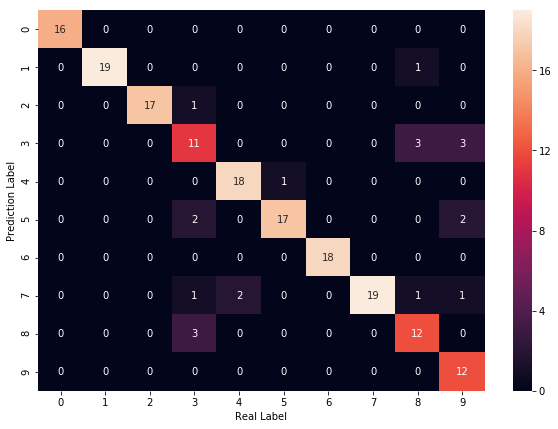

In [20]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [21]:
plt.hist(list_P)

(array([16., 20., 18., 17., 19., 21., 18., 24., 15., 12.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

In [22]:
plt.hist(digits.target[1617:])

(array([16., 19., 17., 18., 20., 18., 18., 19., 17., 18.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

In [23]:
list_P = []
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], digits.target[1617+i]))


#0 min_error:142 index:[5] real:5
#1 min_error:144 index:[2] real:2
#2 min_error:149 index:[8] real:8
#3 min_error:42 index:[0] real:0
#4 min_error:123 index:[1] real:1
#5 min_error:96 index:[7] real:7
#6 min_error:81 index:[6] real:6
#7 min_error:113 index:[3] real:3
#8 min_error:83 index:[2] real:2
#9 min_error:135 index:[1] real:1
#10 min_error:153 index:[7] real:7
#11 min_error:169 index:[7] real:4
#12 min_error:89 index:[6] real:6
#13 min_error:102 index:[3] real:3
#14 min_error:125 index:[1] real:1
#15 min_error:150 index:[3] real:3
#16 min_error:162 index:[7] real:9
#17 min_error:121 index:[1] real:1
#18 min_error:151 index:[7] real:7
#19 min_error:58 index:[6] real:6
#20 min_error:148 index:[8] real:8
#21 min_error:77 index:[4] real:4
#22 min_error:113 index:[3] real:3
#23 min_error:138 index:[1] real:1
#24 min_error:78 index:[4] real:4
#25 min_error:65 index:[0] real:0
#26 min_error:107 index:[5] real:5
#27 min_error:104 index:[3] real:3
#28 min_error:136 index:[6] real:6
#29 

In [24]:
# program to check if there is exist a path between two vertices 
# of a graph 

from collections import defaultdict 

#This class represents a directed graph using adjacency list representation 
class Graph: 

	def __init__(self,vertices): 
		self.V= vertices #No. of vertices 
		self.graph = defaultdict(list) # default dictionary to store graph 

	# function to add an edge to graph 
	def addEdge(self,u,v): 
		self.graph[u].append(v) 
	
	# Use BFS to check path between s and d 
	def isReachable(self, s, d): 
		# Mark all the vertices as not visited 
		visited =[False]*(self.V) 

		# Create a queue for BFS 
		queue=[] 

		# Mark the source node as visited and enqueue it 
		queue.append(s) 
		visited[s] = True

		while queue: 

			#Dequeue a vertex from queue 
			n = queue.pop(0) 
			
			# If this adjacent node is the destination node, 
			# then return true 
			if n == d: 
				return True

			# Else, continue to do BFS 
			for i in self.graph[n]: 
				if visited[i] == False: 
					queue.append(i) 
					visited[i] = True
		# If BFS is complete without visited d 
		return False
    
    
def findAllPath(graph,start,end,path=[]):
    path = path +[start]
    if start == end:
        return [path]
 
    paths = [] #存储所有路径    
    for node in graph[start]:
        if node not in path:
            newpaths = findAllPath(graph,node,end,path) 
            for newpath in newpaths:
                paths.append(newpath)
    return paths

numbers = [*range(2)]
number_of_classification = len(numbers)

list_nodes_number = []
list_connection_number = []

for winner in winner_list:
    used_nodes = list(winner.nodes.keys())
    # create a dict for mapping 
    l1 = numbers + config.genome_config.input_keys + used_nodes[number_of_classification:]
    l2 = range(len(l1))
    dict_nodes = dict(zip(l1, l2))

    ### 将节点加入图
    g = Graph(len(l1))# inputs + outputs + used  
    # add connections in the graph
    for cg in winner.connections.values():
        if cg.enabled:
            g.addEdge(dict_nodes[cg.key[0]],dict_nodes[cg.key[1]])

    v = numbers
    list_connections = []
    for vi in v:
        for u in range(number_of_classification, len(config.genome_config.input_keys) + number_of_classification):
            list_connections.append(g.isReachable(u, vi))

    nodes_inputs = range(number_of_classification, number_of_classification+ 64)
    nodes_outputs = range(number_of_classification)
    nodes_mid = range(number_of_classification + 64, len(dict_nodes))

    # 找到所有输入和输出连接的路
    all_path = []
    for u in nodes_inputs:
        for v in nodes_outputs:
            path = findAllPath(g.graph, u, v)
            if path:
                all_path = all_path + path

    # 得到最长路，以及每个节点在哪个层级
    max_length = max([len(x) for x in all_path])
    nodes_tuples_list = []
    for path in all_path:
        #print(path)
        for node in path:
            nodes_tuples_list.append([node, path.index(node)])

    # 确定节点的层级（消除重复）       
    nodes_tuples_fixed_list = []
    for index in range(max_length):
        for nodes in nodes_tuples_list:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                if nodes not in nodes_tuples_fixed_list:
                    nodes_tuples_fixed_list.append(nodes)


    # 所有有连接的节点
    all_used_nodes = []
    for node in nodes_tuples_fixed_list:
        if node[0] not in all_used_nodes:
            all_used_nodes.append(node[0])

    # 确定节点的层级（最终确定）
    nodes_tuples_fixed_list_final = []

    for node in all_used_nodes:
        if node in nodes_inputs:
            nodes_tuples_fixed_list_final.append([node, 0])
        elif node in nodes_outputs:
            nodes_tuples_fixed_list_final.append([node, max_length - 1])
        else:
            list_node = []
            for nodes in nodes_tuples_fixed_list:
                if node == nodes[0]:
                    list_node.append(nodes)
            layer = 0
            for ele in list_node:
                # 删除重复项，取最大
                if ele[1] > layer:
                    layer = ele[1]
            nodes_tuples_fixed_list_final.append([node,layer])


    # 每个层级的节点合数
    length_of_layers = []
    number_of_nodes = 0
    for index in range(max_length):
        for nodes in nodes_tuples_fixed_list_final:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                number_of_nodes += 1
        length_of_layers.append(number_of_nodes)

    length_of_each_layer = []
    length_of_each_layer.append(length_of_layers[0])
    for i in range(1, max_length):
        length_of_each_layer.append(length_of_layers[i] - length_of_layers[i-1])

    # 输出每个层级的节点个数
    #print("length of each layers:", length_of_each_layer)

    # 所有端到端的路
    all_path_side2side = []
    for path in all_path:
        if len(path) == 2:
            all_path_side2side.append(path)
        else:
            for i in range(len(path)-1):
                all_path_side2side.append([path[i],path[i+1]])

    # 定义节点到绘图的字典
    dict_nodes_graph = dict()
    count_number_layer = [0] * max_length
    for nodes in nodes_tuples_fixed_list_final:
        node, layer = nodes
        dict_nodes_graph[node] = [count_number_layer[layer], layer]
        count_number_layer[layer] += 1
    list_nodes_number.append(np.sum(length_of_each_layer))
    list_connection_number.append(len(all_path_side2side))
    #print("Number of nodes:{} Number of connections:{}".format(np.sum(length_of_each_layer),len(all_path_side2side)))
print("Total nodes:{} Total connections::{}".format(np.sum(list_nodes_number), np.sum(list_connection_number)))

Total nodes:8701 Total connections::8655


In [25]:
necoc = 511
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    for i in range(necoc):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(10 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
print("Testset acc:{}".format(np.sum(list_P == digits.target[:1617])/1617))
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
print("Avg Base Learner:{}".format(np.mean(winner_fitness)))

Testset acc:0.9121830550401979
Avg Base Learner:0.7820660375874242
